## Imports and functions

In [2]:
import numpy as np
import astropy
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from matplotlib.colors import LogNorm
from astropy.table import join


Source_dir ="C:\\Users\\mspan\\OneDrive - The University of Sydney (Students)\\Honours\\Honours Project\\SAMI_TOOLS_SMC_MSPA4681\\"

SAMI_regions = ("Cluster", "Filler", "GAMA")

SAMI_spectra_catalogue = "EmissionLine1compDR3.fits"
with fits.open(Source_dir +"Catalogues\\" + SAMI_spectra_catalogue) as SAMI_spectra_hdul:
    SAMI_spectra_table_hdu = Table(SAMI_spectra_hdul[1].data)


import all_fctns

def refresh_module():
    import importlib
    import all_fctns
    importlib.reload(all_fctns)
    
from all_fctns import *

bpt_metals = ('N II', 'S II', 'O I')

# x limits to stop log from changing sign and div by 0
kewley_xlims = {'N II': 0.47, 'S II': 0.31, 'O I': -0.59} 
kauffman_xlims = [-1.3, 0.05]
Seyfert_LINER_line_startpoints = {'N II': -0.45, 'S II': -0.3, 'O I': -1.13}


## General BPTs


Number of galaxies with S/N > 5:
O III:     2293
H beta:    2130
H alpha:   2597

N II       2549
N II Total 1901

S II       2328
S II Total 1907

O I        1260
O I Total  1226



c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\Code\all_fctns.py:35: RuntimeWarning: divide by zero encountered in divide
  ybpt = 0.61/(xbpt-0.47) + 1.19
c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\Code\all_fctns.py:25: RuntimeWarning: divide by zero encountered in divide
  ybpt = 0.61/(xbpt-0.05) + 1.3
c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\Code\all_fctns.py:39: RuntimeWarning: divide by zero encountered in divide
  ybpt = 0.72/(xbpt-0.31) + 1.30
c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\Code\all_fctns.py:44: RuntimeWarning: divide by zero encountered in divide
  ybpt = 0.73/(xbpt+0.59) + 1.33


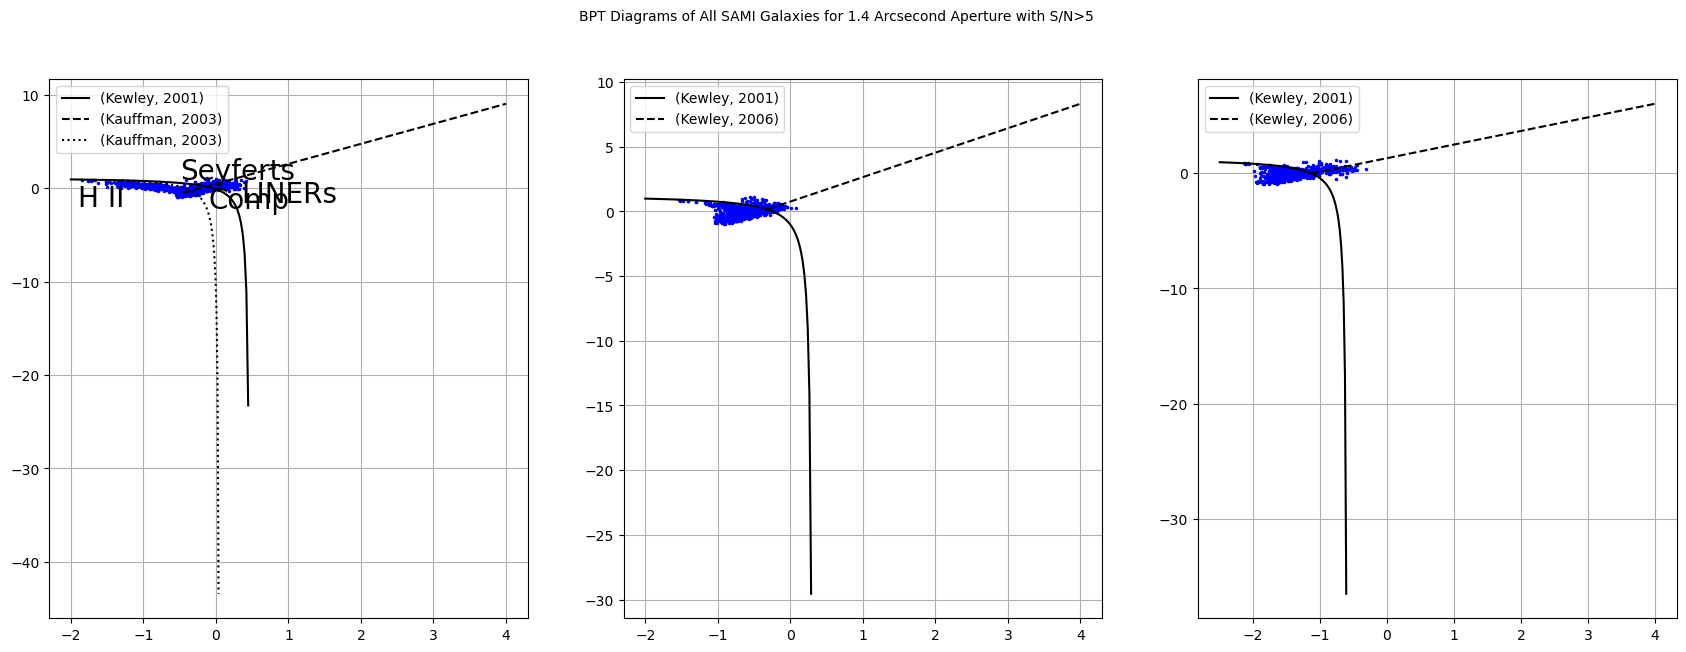

In [ ]:


bpt_metals = ('N II', 'S II', 'O I')
SAMI_metal_column = {'N II': 'NII6583_1_4_ARCSECOND', 'S II': 'SII6716_1_4_ARCSECOND', 'O I': 'OI6300_1_4_ARCSECOND'}


SN_lim = 5


print()
height, width = 7, 21
fig1, axs = plt.subplots(1, 3)
fig1.set_figheight(height)
fig1.set_figwidth(width)
fig1.suptitle(f'BPT Diagrams of All SAMI Galaxies for 1.4 Arcsecond Aperture with S/N>{SN_lim}', fontsize=10)

plot_xlims = {'N II': [-2, 1], 'S II': [-2, 0.5], 'O I': [-2.5, 0.5]} 


# construct BPT for 1.4 sec aperture removing anything with S/N ratio greater than limit
OIII_flux = SAMI_spectra_table_hdu['OIII5007_1_4_ARCSECOND']
OIII_error = SAMI_spectra_table_hdu['OIII5007_1_4_ARCSECOND_ERR']
HBeta_flux = SAMI_spectra_table_hdu['HBETA_1_4_ARCSECOND']
HBeta_error = SAMI_spectra_table_hdu['HBETA_1_4_ARCSECOND_ERR']

BPT_y = np.log10(OIII_flux/HBeta_flux)

HAlpha_flux = SAMI_spectra_table_hdu['HALPHA_1_4_ARCSECOND']
HAlpha_error = SAMI_spectra_table_hdu['HALPHA_1_4_ARCSECOND_ERR']
print(f"Number of galaxies with S/N > {SN_lim}:")
print(f"{'O III:':10} {sum((OIII_flux/OIII_error > SN_lim))}")
print(f"{'H beta:':10} {sum((HBeta_flux/HBeta_error > SN_lim))}")
print(f"{'H alpha:':10} {sum((HAlpha_flux/HAlpha_error > SN_lim))}\n")


for i, metal in enumerate(bpt_metals):
    metal_flux = SAMI_spectra_table_hdu[SAMI_metal_column[metal]]
    metal_error = SAMI_spectra_table_hdu[f'{SAMI_metal_column[metal]}_ERR']

    BPT_x = np.log10(metal_flux/HAlpha_flux)

    print(f"{metal:10} {sum((metal_flux/metal_error > SN_lim))}")

    SN_mask =(HBeta_flux/HBeta_error > SN_lim) & (OIII_flux/OIII_error > SN_lim) & (HAlpha_flux/HAlpha_error > SN_lim) & (metal_flux/metal_error > SN_lim)
    print(f"{f'{metal} Total':10} {sum(SN_mask)}\n")

    ax = axs.flatten()[i]
    ax.plot(BPT_x[SN_mask], BPT_y[SN_mask],'b.', markersize=3) 

    # kewley AGN/HII or composite line
    xbpt = np.linspace(plot_xlims[metal][0], kewley_xlims[metal], 100)
    ax.plot(xbpt,k01_bpt_formula(xbpt, metal),color='k',linestyle='-', label='(Kewley, 2001)')

    # Seyfert and LINER divider line
    paper = '(Kewley, 2006)'
    if metal == 'N II':
        paper = '(Kauffman, 2003)'

    xbpt= np.linspace(Seyfert_LINER_line_startpoints[metal], 4, 100)
    ax.plot(xbpt,ka03_ke06_Seyfert_LINER_formula(xbpt, metal),color='k',linestyle='--', label=paper)

    if metal == 'N II':
        xbpt = np.linspace(kauffman_xlims[0], kauffman_xlims[1], 100)
        ax.plot(xbpt,k03_bpt_formula(xbpt),color='k',linestyle=':', label='(Kauffman, 2003)')


        fontsize = 20
        ax.text(-0.5, 1, 'Seyferts', size = fontsize)
        ax.text(0.35, -1.5, 'LINERs', size=fontsize)
        ax.text(-0.1, -2.2, 'Comp', size=fontsize)
        ax.text(-1.9, -1.9, 'H II', size=fontsize)

    
    ax.legend()
    ax.grid()
#xlim=kewley_xlims[metal],


Number of galaxies with S/N > 5:
O III:     2293
H beta:    2130
H alpha:   2597

N II       2549
N II Total 1901

S II       2276
S II Total 1890

O I        1260
O I Total  1226



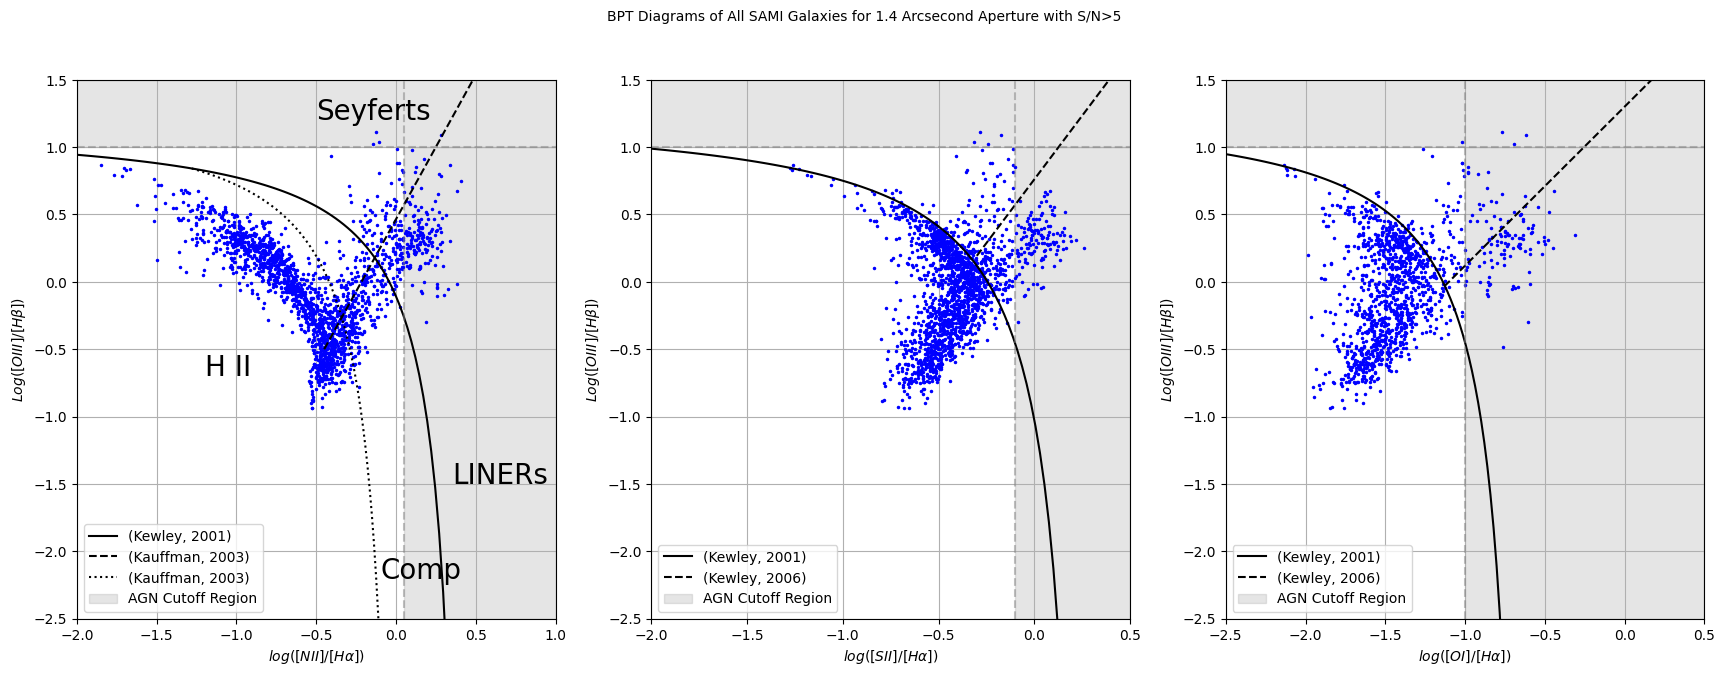

In [36]:
bpt_metals = ('N II', 'S II', 'O I')
SAMI_metal_column = {'N II':'NII6583_1_4_ARCSECOND', 'S II': 'SII6716_1_4_ARCSECOND', 'O I': 'OI6300_1_4_ARCSECOND'}



SN_lim = 5




with fits.open(Source_dir +"Catalogues\\" + SAMI_spectra_catalogue) as SAMI_spectra_hdul:
    SAMI_spectra_table_hdu = Table(SAMI_spectra_hdul[1].data)


height, width = 7, 21
fig1, axs = plt.subplots(1, 3)
fig1.set_figheight(height)
fig1.set_figwidth(width)
fig1.suptitle(f'BPT Diagrams of All SAMI Galaxies for 1.4 Arcsecond Aperture with S/N>{SN_lim}', fontsize=10)

plot_xlims = {'N II': [-2, 1], 'S II': [-2, 0.5], 'O I': [-2.5, 0.5]} 


# construct BPT for 1.4 sec aperture removing anything with S/N ratio greater than limit
OIII_flux, OIII_error = get_flux_and_error_1_4_ARCSEC(SAMI_spectra_table_hdu, 'O III')
HBeta_flux, HBeta_error = get_flux_and_error_1_4_ARCSEC(SAMI_spectra_table_hdu, 'H Beta')

BPT_y = np.log10(OIII_flux/HBeta_flux)

HAlpha_flux, HAlpha_error = get_flux_and_error_1_4_ARCSEC(SAMI_spectra_table_hdu, 'H Alpha')
print(f"Number of galaxies with S/N > {SN_lim}:")
print(f"{'O III:':10} {sum((OIII_flux/OIII_error > SN_lim))}")
print(f"{'H beta:':10} {sum((HBeta_flux/HBeta_error > SN_lim))}")
print(f"{'H alpha:':10} {sum((HAlpha_flux/HAlpha_error > SN_lim))}\n")




for i, metal in enumerate(bpt_metals):
    metal_flux, metal_error = get_flux_and_error_1_4_ARCSEC(SAMI_spectra_table_hdu, metal)
    BPT_x = np.log10(metal_flux/HAlpha_flux)

    print(f"{metal:10} {sum((metal_flux/metal_error > SN_lim))}")
    
    SN_mask =(HBeta_flux/HBeta_error > SN_lim) & (OIII_flux/OIII_error > SN_lim) & (HAlpha_flux/HAlpha_error > SN_lim) & (metal_flux/metal_error > SN_lim)
    print(f"{f'{metal} Total':10} {sum(SN_mask)}\n")

    ax = axs.flatten()[i]
    ax.plot(BPT_x[SN_mask], BPT_y[SN_mask],'b.', markersize=3) 
    
    plot_BPT_lines(ax, metal)


#xlim=kewley_xlims[metal],



Trying OI/Ha v OIII/OII approach in Kewley 2006

Number of galaxies with S/N > 5:
O III:     2293
O II:      1450
H alpha:   2597

O I:       2615

Total      1116


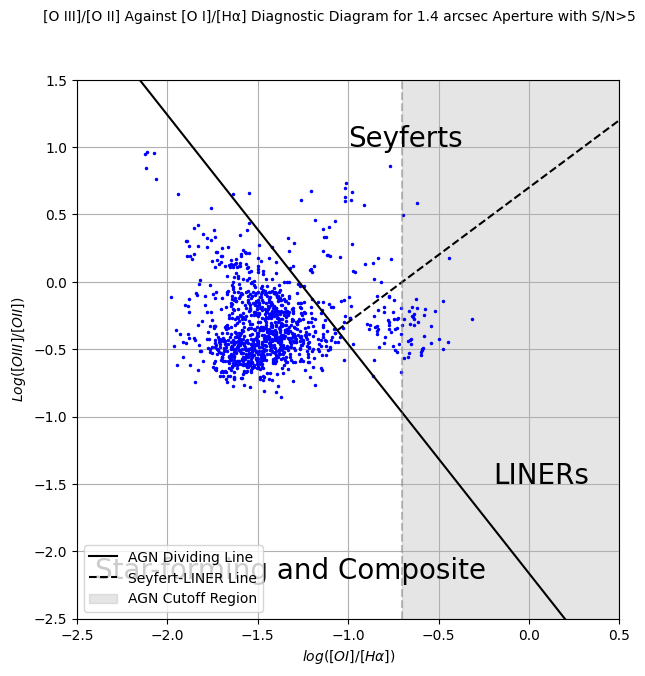

In [37]:
SN_lim = 5


with fits.open(Source_dir +"Catalogues\\" + SAMI_spectra_catalogue) as SAMI_spectra_hdul:
    SAMI_spectra_table_hdu = Table(SAMI_spectra_hdul[1].data)


height, width = 7, 7
fig1, axs = plt.subplots(1, 1)
fig1.set_figheight(height)
fig1.set_figwidth(width)
fig1.suptitle(f'[O III]/[O II] Against [O I]/[Hα] Diagnostic Diagram for 1.4 arcsec Aperture with S/N>{SN_lim}', fontsize=10)

plot_xlims = [-2.5, 0.5]
plot_ylims=[-2.5,1.5]

# construct BPT for 1.4 sec aperture removing anything with S/N ratio greater than limit
OIII_flux, OIII_error = get_flux_and_error_1_4_ARCSEC(SAMI_spectra_table_hdu, 'O III')
OII_flux, OII_error = get_flux_and_error_1_4_ARCSEC(SAMI_spectra_table_hdu, 'O II')

BPT_y = np.log10(OIII_flux/OII_flux)

HAlpha_flux, HAlpha_error = get_flux_and_error_1_4_ARCSEC(SAMI_spectra_table_hdu, 'H Alpha')
OI_flux, OI_error = get_flux_and_error_1_4_ARCSEC(SAMI_spectra_table_hdu, 'O I') 

BPT_x = np.log10(OI_flux/HAlpha_flux)

SN_mask =(OII_flux/OII_error > SN_lim) & (OIII_flux/OIII_error > SN_lim) & (HAlpha_flux/HAlpha_error > SN_lim) & (OI_flux/OI_error > SN_lim)

print(f"Number of galaxies with S/N > {SN_lim}:")
print(f"{'O III:':10} {sum((OIII_flux/OIII_error > SN_lim))}")
print(f"{'O II:':10} {sum((OII_flux/OII_error > SN_lim))}")
print(f"{'H alpha:':10} {sum((HAlpha_flux/HAlpha_error > SN_lim))}\n")
print(f"{'O I:':10} {sum((OI_flux/HAlpha_error > OI_error))}\n")
print(f"{'Total':10} {sum(SN_mask)}")


ax = axs

ax.plot(BPT_x[SN_mask], BPT_y[SN_mask],'b.', markersize=3) 

plot_Oxygen_diagnostic_lines(ax, plot_xlims=plot_xlims, plot_ylims=plot_ylims)


## Categorising BPT diagram regions

start with arrays of flux data and errors:

    for each BPT diagram type:
        columns = 
        if cube is in emission line catalogue:
            if S/N > SN_lim:
                begin checking region

                 
                first check is an AGN 
                    if metal = 'N II':
                        check that each of the four corners of error box is in a region.
                        possible ouputs: 'Star-forming', 'Composite', 'AGN', 'Inconclusive'

                    else:
                        Need to check if bottom 2 corners are above line
                        if True:
                            galaxy_type = 'AGN'

                            then check if LINER or Seyfert
                                if bottom 2 corners above Seyfert/Liner divider:
                                    AGN_type = 'Seyfert'

                                else:
                                    if Top two corners below line:
                                        AGN_type = 'LINER'
                                    else:
                                        AGN_type = 'Inconclusive'

                        else:
                            AGN_type = --

                            check if top two are below line
                            if True:
                                galaxy_type = 'HII or Composite'
                            else:
                                galaxy_type = 'inconclusive


            else:
                --
        else:
            --




### BPT diagram w/ labels

Number of galaxies with S/N > 5:
O III:     2293
H beta:    2130
H alpha:   2597

N II       2549
N II Total 1901

S II       2276
S II Total 1890

O I        1260
O I Total  1226



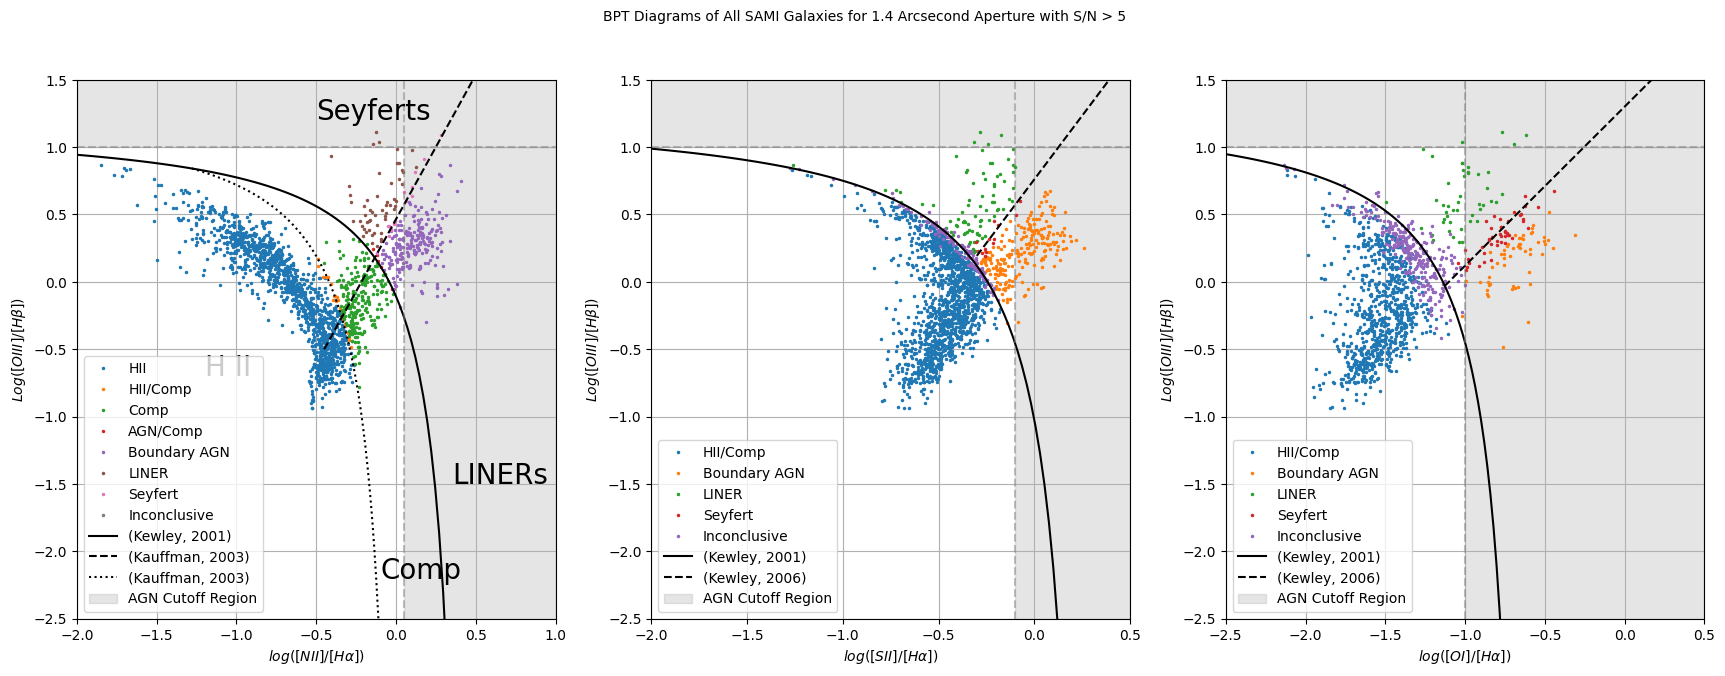

In [38]:
def get_BPT_AGN_classification_old(BPT_x, BPT_x_error, BPT_y, BPT_y_error, metal = 'N II', plot_type = 'BPT'):
    """
    Take flux emission line values and errors to determine if galaxy is an AGN based on Kauffman 2003 and Kewley 2001 \\
    NOTE - does not do S/N filtering, must be done seperately \\
    returns: array of galaxy_type, mask of is_AGN \\
        galaxy_type: either \\
            0 - Star-forming \\
			1 - located on Star-forming / Composite region boundary \\
			2 - Composite\\
			3 - located on Composite / AGN region boundary\\
			4 - LINER\\
			5 - Seyfert\\
			6 - located on LINER / Seyfert boundary\\
            7 - located on boundary of all 3 regions

    """    
    # initialise array
    galaxy_types = np.array([7]*len(BPT_x))


    BPT_y_max = BPT_y + BPT_y_error
    BPT_y_min = BPT_y - BPT_y_error

    BPT_x_max = BPT_x + BPT_x_error
    BPT_x_min = BPT_x - BPT_x_error


    if plot_type == 'BPT':
        # check if AGN first:    is_AGN if y_min >= f(x_min) and y_min >= f(x_max) i.e. above Kewley 2001 line
        k01_BPT_x_min = k01_bpt_formula(BPT_x_min, metal)
        k01_BPT_x_max = k01_bpt_formula(BPT_x_max, metal)

        is_AGN = (BPT_y_min >= k01_BPT_x_min) & (BPT_y_min >= k01_BPT_x_max)

        if metal == 'N II':
            k03_BPT_x_min = k03_bpt_formula(BPT_x_min)
            k03_BPT_x_max = k03_bpt_formula(BPT_x_max)

            is_star_forming = (BPT_y_max < k03_BPT_x_min) & (BPT_y_max < k03_BPT_x_max)

            is_composite = (BPT_y_max > k03_BPT_x_min) & (BPT_y_max > k03_BPT_x_max) & (BPT_y_min <= k01_BPT_x_min) & (BPT_y_min <= k01_BPT_x_max)



            #                                   Below AGN dividing line (k01)  and not solely in either region
            is_composite_or_star_forming = (BPT_y_min <= k01_BPT_x_min) & (BPT_y_min <= k01_BPT_x_max) & ~is_composite & ~is_star_forming

            #                                   Above Comp/HII dividing line (k03) and not solely in either region
            is_composite_or_AGN = (BPT_y_max > k03_BPT_x_min) & (BPT_y_max > k03_BPT_x_max) & ~is_composite & ~is_AGN
            galaxy_types[is_star_forming] = 0
            galaxy_types[is_composite_or_star_forming] = 1
            galaxy_types[is_composite] = 2
            galaxy_types[is_composite_or_AGN] = 3

        elif metal in ('S II', 'O I'):
            is_star_forming = (BPT_y_max < k01_BPT_x_min) & (BPT_y_max < k01_BPT_x_max)
            galaxy_types[is_star_forming] = 1

        else:
            print("Not a valid BPT metal type")
            raise(TypeError)
        
    
        Seyfert_LINER_x_min = ka03_ke06_Seyfert_LINER_formula(BPT_x_min, metal)
        Seyfert_LINER_x_max = ka03_ke06_Seyfert_LINER_formula(BPT_x_max, metal)

            
    elif plot_type == 'O_diagram':
        k06_AGN_x_min = k06_AGN_formula(BPT_x_min)
        k06_AGN_x_max = k06_AGN_formula(BPT_x_max)

        is_AGN = (BPT_y_min >=k06_AGN_x_min) & (BPT_y_min >= k06_AGN_x_max)

        is_star_forming = (BPT_y_max < k06_AGN_x_min) & (BPT_y_max < k06_AGN_x_max)
        galaxy_types[is_star_forming] = 1

        Seyfert_LINER_x_min = k06_Seyfert_LINER_formula(BPT_x_min)
        Seyfert_LINER_x_max = k06_Seyfert_LINER_formula(BPT_x_max)

    else:
        print("Not a valid plot type")
        raise(TypeError)
    # Check what type of AGN

    galaxy_types[is_AGN] = 6 # initialise AGNs

    is_LINER = is_AGN & (BPT_y_max < Seyfert_LINER_x_min) &  (BPT_y_max < Seyfert_LINER_x_max) 
    is_Seyfert = is_AGN & (BPT_y_min > Seyfert_LINER_x_min) &  (BPT_y_min > Seyfert_LINER_x_max)

    galaxy_types[is_LINER] = 4
    galaxy_types[is_Seyfert] = 5

    return galaxy_types, is_AGN
galaxy_labels = ('HII', 'HII/Comp', 'Comp', 'AGN/Comp', 'Boundary AGN', 'LINER', 'Seyfert',  'Inconclusive')
SN_lim = 5

bpt_metals = ('N II', 'S II', 'O I')

# x limits to stop log from changing sign and div by 0
kewley_xlims = {'N II': 0.47, 'S II': 0.31, 'O I': -0.59} 
kauffman_xlims = [-1.3, 0.05]
Seyfert_LINER_line_startpoints = {'N II': -0.45, 'S II': -0.3, 'O I': -1.13}

height, width = 7, 21
fig1, axs = plt.subplots(1, 3)
fig1.set_figheight(height)
fig1.set_figwidth(width)
fig1.suptitle(f'BPT Diagrams of All SAMI Galaxies for 1.4 Arcsecond Aperture with S/N > {SN_lim}', fontsize=10)

plot_xlims = {'N II': [-2, 1], 'S II': [-2, 0.5], 'O I': [-2.5, 0.5]} 


# construct BPT for 1.4 sec aperture removing anything with S/N ratio greater than limit
OIII_flux, OIII_error = get_flux_and_error_1_4_ARCSEC(SAMI_spectra_table_hdu, 'O III')
HBeta_flux, HBeta_error = get_flux_and_error_1_4_ARCSEC(SAMI_spectra_table_hdu, 'H Beta')

BPT_y = np.log10(OIII_flux/HBeta_flux)

HAlpha_flux, HAlpha_error = get_flux_and_error_1_4_ARCSEC(SAMI_spectra_table_hdu, 'H Alpha')
print(f"Number of galaxies with S/N > {SN_lim}:")
print(f"{'O III:':10} {sum((OIII_flux/OIII_error > SN_lim))}")
print(f"{'H beta:':10} {sum((HBeta_flux/HBeta_error > SN_lim))}")
print(f"{'H alpha:':10} {sum((HAlpha_flux/HAlpha_error > SN_lim))}\n")



#testing
for i, metal in enumerate(bpt_metals):
    #for i, metal in enumerate(bpt_metals):
    metal_flux, metal_error = get_flux_and_error_1_4_ARCSEC(SAMI_spectra_table_hdu, metal)

    print(f"{metal:10} {sum((metal_flux/metal_error > SN_lim))}")

    SN_mask = (HBeta_flux/HBeta_error > SN_lim) & (OIII_flux/OIII_error > SN_lim) & (HAlpha_flux/HAlpha_error > SN_lim) & (metal_flux/metal_error > SN_lim)
    print(f"{f'{metal} Total':10} {sum(SN_mask)}\n")

    BPT_y = np.log10(OIII_flux/HBeta_flux)
    BPT_x = np.log10(metal_flux/HAlpha_flux)

    BPT_y_error = BPT_y * np.sqrt( (OIII_error/OIII_flux)**2+(HBeta_error/HBeta_flux)**2)
    BPT_x_error = BPT_x * np.sqrt( (metal_error/metal_flux)**2+(HAlpha_error/HAlpha_flux)**2)


    galaxy_types, is_AGN = get_BPT_AGN_classification_old(BPT_x, BPT_x_error, BPT_y, BPT_y_error, metal=metal)
    ax = axs.flatten()[i]
    if metal == 'N II':
        possible_galaxies = (0,1,2,3,4,5,6,7)

    else:
        possible_galaxies = (1,4,5,6,7)

    for possible_type in possible_galaxies:

        galaxy_type_mask = galaxy_types == possible_type

        if len(galaxy_type_mask)==0:
            continue

        ax.plot(BPT_x[SN_mask & galaxy_type_mask], BPT_y[SN_mask & galaxy_type_mask],'.', markersize=3, label=galaxy_labels[possible_type]) 

    plot_BPT_lines(ax, metal, have_legend=True)


Number of galaxies with S/N > 5 that can be classified:
N II Total: 2042
S II Total: 1964
O I Total: 1239


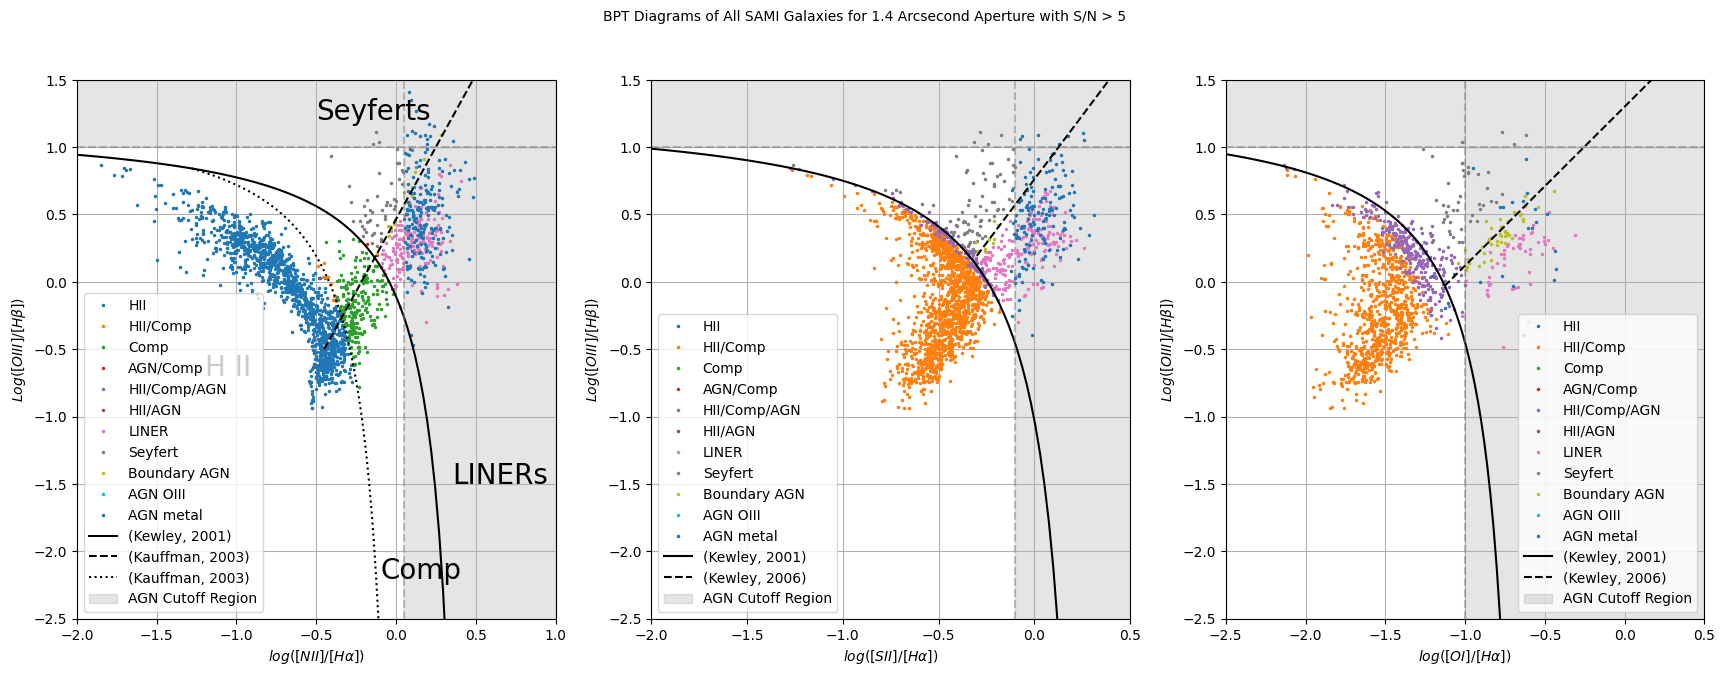

In [39]:
refresh_module()

SN_lim = 5

bpt_metals = ('N II', 'S II', 'O I')
galaxy_labels = ('HII', 'HII/Comp', 'Comp', 'AGN/Comp', 'HII/Comp/AGN', 'HII/AGN', 'LINER', 'Seyfert', 'Boundary AGN', 'AGN OIII', 'AGN metal', 'Inconclusive')
possible_galaxies = (0,1,2,3,4,5,6,7,8,9,10)

# x limits to stop log from changing sign and div by 0
kewley_xlims = {'N II': 0.47, 'S II': 0.31, 'O I': -0.59} 
kauffman_xlims = [-1.3, 0.05]
Seyfert_LINER_line_startpoints = {'N II': -0.45, 'S II': -0.3, 'O I': -1.13}

height, width = 7, 21
fig1, axs = plt.subplots(1, 3)
fig1.set_figheight(height)
fig1.set_figwidth(width)
fig1.suptitle(f'BPT Diagrams of All SAMI Galaxies for 1.4 Arcsecond Aperture with S/N > {SN_lim}', fontsize=10)

plot_xlims = {'N II': [-2, 1], 'S II': [-2, 0.5], 'O I': [-2.5, 0.5]} 

with fits.open(Source_dir +"Catalogues\\" + SAMI_spectra_catalogue) as SAMI_spectra_hdul:
    SAMI_spectra_table_hdu = Table(SAMI_spectra_hdul[1].data)


# construct BPT for 1.4 sec aperture removing anything with S/N ratio greater than limit
OIII_flux, OIII_error = get_flux_and_error_1_4_ARCSEC(SAMI_spectra_table_hdu, 'O III')
HBeta_flux, HBeta_error = get_flux_and_error_1_4_ARCSEC(SAMI_spectra_table_hdu, 'H Beta')

BPT_y = np.log10(OIII_flux/HBeta_flux)

HAlpha_flux, HAlpha_error = get_flux_and_error_1_4_ARCSEC(SAMI_spectra_table_hdu, 'H Alpha')

print(f"Number of galaxies with S/N > {SN_lim} that can be classified:")

#testing
for i, metal in enumerate(bpt_metals):
    #for i, metal in enumerate(bpt_metals):
    metal_flux, metal_error = get_flux_and_error_1_4_ARCSEC(SAMI_spectra_table_hdu, metal)


    SN_mask = (HBeta_flux/HBeta_error > SN_lim) & (OIII_flux/OIII_error > SN_lim) & (HAlpha_flux/HAlpha_error > SN_lim) & (metal_flux/metal_error > SN_lim)

    BPT_y = np.log10(OIII_flux/HBeta_flux)
    BPT_x = np.log10(metal_flux/HAlpha_flux)

    BPT_y_error = BPT_y * np.sqrt( (OIII_error/OIII_flux)**2+(HBeta_error/HBeta_flux)**2)
    BPT_x_error = BPT_x * np.sqrt( (metal_error/metal_flux)**2+(HAlpha_error/HAlpha_flux)**2)


    galaxy_types, is_AGN = all_fctns.get_BPT_AGN_classification(BPT_x, BPT_x_error, BPT_y, BPT_y_error, metal=metal, SN_lim=SN_lim)
    ax = axs.flatten()[i]

    print(f"{metal} Total: {np.sum(galaxy_types !=-1)}")


    for possible_type in possible_galaxies:

        galaxy_type_mask = galaxy_types == possible_type

        if len(galaxy_type_mask)!=0:

            ax.plot(BPT_x[galaxy_type_mask], BPT_y[galaxy_type_mask],'.', markersize=3, label=galaxy_labels[possible_type]) 

    plot_BPT_lines(ax, metal, have_legend=True)

Number of galaxies with S/N > 5:
O III:     2293/3425
H beta:    2130/3425
H alpha:   2597/3425

N II       2549/3425
N II Total 1901/3425

S II       2276/3425
S II Total 1890/3425

O I        1260/3425
O I Total  1226/3425



c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\Code\all_fctns.py:194: RuntimeWarning: invalid value encountered in log10
  
c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\Code\all_fctns.py:197: RuntimeWarning: invalid value encountered in log10
  
c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\Code\all_fctns.py:35: RuntimeWarning: divide by zero encountered in divide
  ybpt = 0.61/(xbpt-0.47) + 1.19
c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\Code\all_fctns.py:25: RuntimeWarning: divide by zero encountered in divide
  ybpt = 0.61/(xbpt-0.05) + 1.3
c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\Code\all_fctns.py:39: RuntimeWarning: divide by zero encountered in divide
  ybpt = 0.72/(xbpt-0.31) + 1.30
c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\Code\al

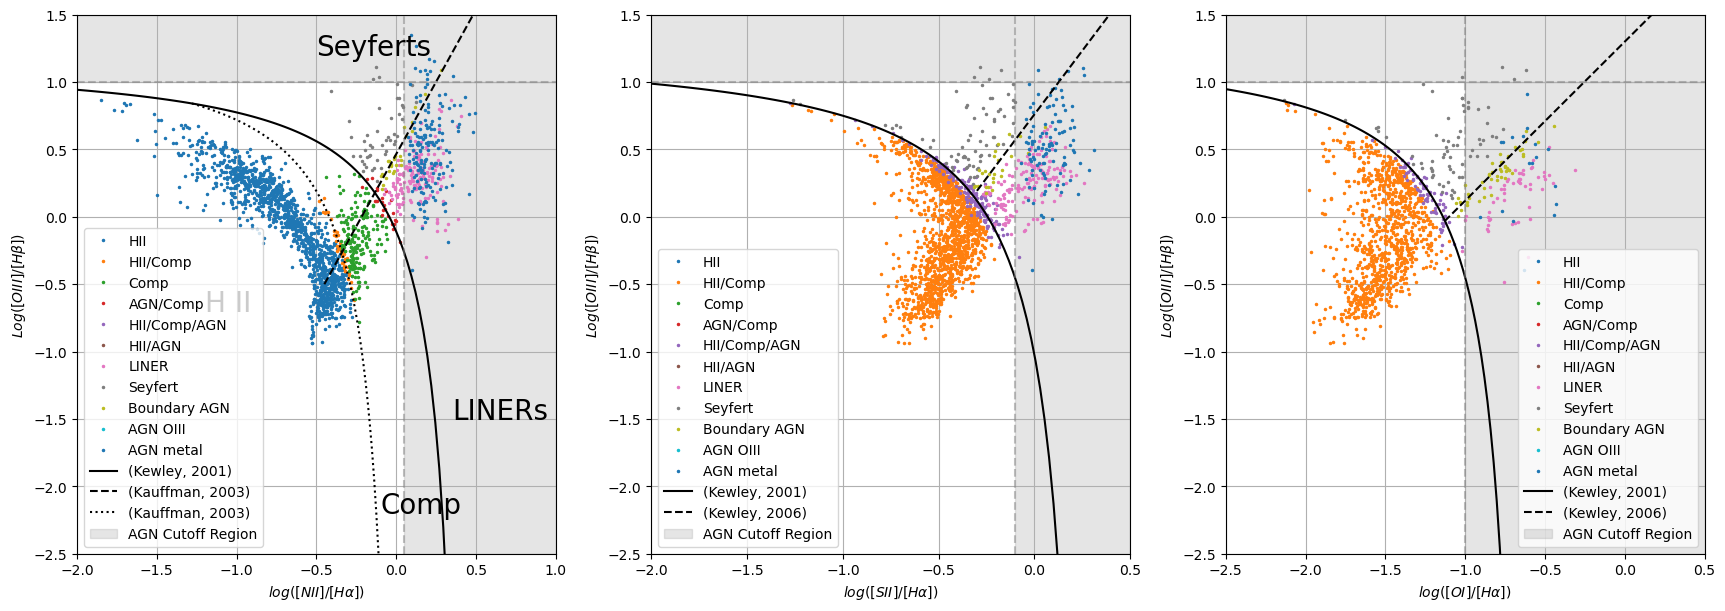

In [109]:
SN_lim =5

fig1, axs, SAMI_spectra_table_hdu, all_galaxy_types_array = all_fctns.plot_full_BPT_diagrams(SAMI_spectra_table_hdu, SN_lim=SN_lim)

### Oxygen plot

{'agg_filter': None, 'alpha': None, 'animated': False, 'axes': [<Axes: >], 'children': [<matplotlib.patches.Rectangle object at 0x00000247F670B950>, <Axes: >, Text(0.5, 0.98, '[O III]/[O II] Against [O I]/[Hα] Diagnostic Diagram for 1.4 arcsec Aperture with S/N>5')], 'clip_box': None, 'clip_on': True, 'clip_path': None, 'constrained_layout': False, 'constrained_layout_pads': (None, None, None, None), 'default_bbox_extra_artists': [<Axes: >, Text(0.5, 0.98, '[O III]/[O II] Against [O I]/[Hα] Diagnostic Diagram for 1.4 arcsec Aperture with S/N>5'), <matplotlib.spines.Spine object at 0x00000247F670A850>, <matplotlib.spines.Spine object at 0x00000247F670A6D0>, <matplotlib.spines.Spine object at 0x00000247F6709C50>, <matplotlib.spines.Spine object at 0x00000247F6709B10>, <matplotlib.patches.Rectangle object at 0x00000247F66E6690>], 'dpi': 100.0, 'edgecolor': (1.0, 1.0, 1.0, 1.0), 'facecolor': (1.0, 1.0, 1.0, 1.0), 'figheight': 7.0, 'figure': <Figure size 1000x700 with 1 Axes>, 'figwidth': 1

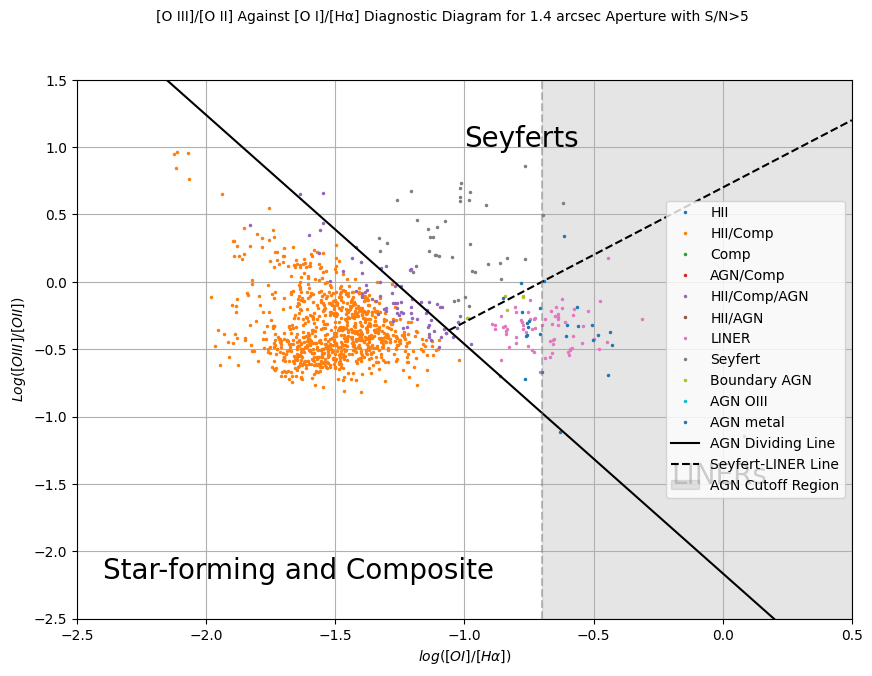

In [40]:
SN_lim = 5


with fits.open(Source_dir +"Catalogues\\" + SAMI_spectra_catalogue) as SAMI_spectra_hdul:
    SAMI_spectra_table_hdu = Table(SAMI_spectra_hdul[1].data)


height, width = 7, 10
fig1, axs = plt.subplots(1, 1)
fig1.set(figheight=height, figwidth=width)
fig1.suptitle(f'[O III]/[O II] Against [O I]/[Hα] Diagnostic Diagram for 1.4 arcsec Aperture with S/N>{SN_lim}', fontsize=10)
print(fig1.properties())
plot_xlims = [-2.5, 0.5]

# construct BPT for 1.4 sec aperture removing anything with S/N ratio greater than limit
OIII_flux, OIII_error = get_flux_and_error_1_4_ARCSEC(SAMI_spectra_table_hdu, 'O III')
OII_flux, OII_error = get_flux_and_error_1_4_ARCSEC(SAMI_spectra_table_hdu, 'O II')

BPT_y = np.log10(OIII_flux/OII_flux)

HAlpha_flux, HAlpha_error = get_flux_and_error_1_4_ARCSEC(SAMI_spectra_table_hdu, 'H Alpha')
OI_flux, OI_error = get_flux_and_error_1_4_ARCSEC(SAMI_spectra_table_hdu, 'O I') 

SN_mask =(OII_flux/OII_error > SN_lim) & (OIII_flux/OIII_error > SN_lim) & (HAlpha_flux/HAlpha_error > SN_lim) & (OI_flux/OI_error > SN_lim)
print(f"Number of galaxies with S/N > {SN_lim}:")
print(f"{'O III:':10} {sum((OIII_flux/OIII_error > SN_lim))}")
print(f"{'O II:':10} {sum((OII_flux/OII_error > SN_lim))}")
print(f"{'H alpha:':10} {sum((HAlpha_flux/HAlpha_error > SN_lim))}")
print(f"{'O I:':10} {sum((OI_flux/HAlpha_error > OI_error))}")
print(f"{'Total':10} {sum(SN_mask)}")


BPT_y = np.log10(OIII_flux/OII_flux)
BPT_x = np.log10(OI_flux/HAlpha_flux)

BPT_y_error = BPT_y * np.sqrt( (OIII_error/OIII_flux)**2+(OII_error/OII_flux)**2)
BPT_x_error = BPT_x * np.sqrt( (OI_error/OI_flux)**2+(HAlpha_error/HAlpha_flux)**2)

galaxy_types, is_AGN = get_BPT_AGN_classification(BPT_x, BPT_x_error, BPT_y, BPT_y_error, plot_type='O_diagram')

ax = axs

possible_galaxies = (0,1,2,3,4,5,6,7,8,9,10)

for possible_type in possible_galaxies:

    galaxy_type_mask = galaxy_types == possible_type

    if len(galaxy_type_mask)==0:
        continue

    ax.plot(BPT_x[galaxy_type_mask], BPT_y[galaxy_type_mask],'.', markersize=3, label=galaxy_labels[possible_type]) 


plot_Oxygen_diagnostic_lines(ax)

## NII labels

### BPT Diagrams w/ NII labels

Number of galaxies with S/N > 5:
O III:     2293
H beta:    2130
H alpha:   2597

N II       2549
N II Total 1901

S II       2276
S II Total 1890

O I        1260
O I Total  1226



c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Code\all_fctns.py:35: RuntimeWarning: divide by zero encountered in divide
  ybpt = 0.61/(xbpt-0.47) + 1.19
c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Code\all_fctns.py:25: RuntimeWarning: divide by zero encountered in divide
  ybpt = 0.61/(xbpt-0.05) + 1.3
c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Code\all_fctns.py:39: RuntimeWarning: divide by zero encountered in divide
  ybpt = 0.72/(xbpt-0.31) + 1.30
c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Code\all_fctns.py:44: RuntimeWarning: divide by zero encountered in divide
  ybpt = 0.73/(xbpt+0.59) + 1.33


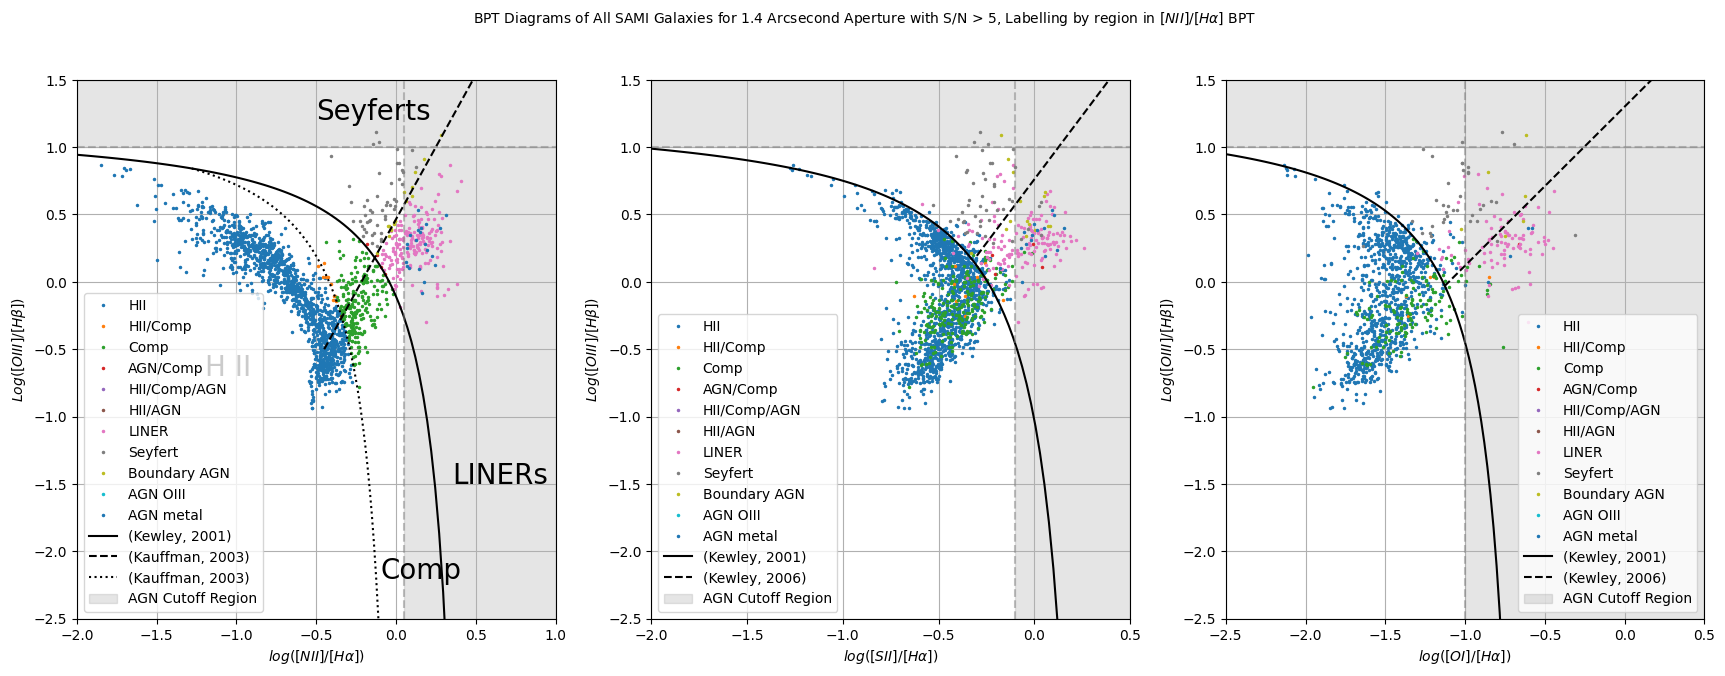

In [41]:
refresh_module()

SN_lim = 5


bpt_metals = ('N II', 'S II', 'O I')

# x limits to stop log from changing sign and div by 0
kewley_xlims = {'N II': 0.47, 'S II': 0.31, 'O I': -0.59} 
kauffman_xlims = [-1.3, 0.05]
Seyfert_LINER_line_startpoints = {'N II': -0.45, 'S II': -0.3, 'O I': -1.13}

height, width = 7, 21
fig1, axs = plt.subplots(1, 3)
fig1.set_figheight(height)
fig1.set_figwidth(width)
fig1.suptitle(f'BPT Diagrams of All SAMI Galaxies for 1.4 Arcsecond Aperture with S/N > {SN_lim}, Labelling by region in $[NII]/[H\\alpha]$ BPT', fontsize=10)

plot_xlims = {'N II': [-2, 1], 'S II': [-2, 0.5], 'O I': [-2.5, 0.5]} 


# construct BPT for 1.4 sec aperture removing anything with S/N ratio greater than limit
OIII_flux, OIII_error = all_fctns.get_flux_and_error_1_4_ARCSEC(SAMI_spectra_table_hdu, 'O III')
HBeta_flux, HBeta_error = all_fctns.get_flux_and_error_1_4_ARCSEC(SAMI_spectra_table_hdu, 'H Beta')

BPT_y = np.log10(OIII_flux/HBeta_flux)

HAlpha_flux, HAlpha_error = all_fctns.get_flux_and_error_1_4_ARCSEC(SAMI_spectra_table_hdu, 'H Alpha')
print(f"Number of galaxies with S/N > {SN_lim}:")
print(f"{'O III:':10} {sum((OIII_flux/OIII_error > SN_lim))}")
print(f"{'H beta:':10} {sum((HBeta_flux/HBeta_error > SN_lim))}")
print(f"{'H alpha:':10} {sum((HAlpha_flux/HAlpha_error > SN_lim))}\n")

galaxy_labels = ('HII', 'HII/Comp', 'Comp', 'AGN/Comp', 'HII/Comp/AGN', 'HII/AGN', 'LINER', 'Seyfert', 'Boundary AGN', 'AGN OIII', 'AGN metal', 'Inconclusive')
possible_galaxies = (0,1,2,3,4,5,6,7,8,9,10)


#testing
for i, metal in enumerate(bpt_metals):
    #for i, metal in enumerate(bpt_metals):
    metal_flux, metal_error = all_fctns.get_flux_and_error_1_4_ARCSEC(SAMI_spectra_table_hdu, metal)

    print(f"{metal:10} {sum((metal_flux/metal_error > SN_lim))}")

    SN_mask = (HBeta_flux/HBeta_error > SN_lim) & (OIII_flux/OIII_error > SN_lim) & (HAlpha_flux/HAlpha_error > SN_lim) & (metal_flux/metal_error > SN_lim)
    print(f"{f'{metal} Total':10} {sum(SN_mask)}\n")

    BPT_y = np.log10(OIII_flux/HBeta_flux)
    BPT_x = np.log10(metal_flux/HAlpha_flux)

    BPT_y_error = BPT_y * np.sqrt( (OIII_error/OIII_flux)**2+(HBeta_error/HBeta_flux)**2)
    BPT_x_error = BPT_x * np.sqrt( (metal_error/metal_flux)**2+(HAlpha_error/HAlpha_flux)**2)

    if i ==0:
        NII_galaxy_types, _ = all_fctns.get_BPT_AGN_classification(BPT_x, BPT_x_error, BPT_y, BPT_y_error, metal=metal)

    ax = axs.flatten()[i]

    for possible_type in possible_galaxies:

        galaxy_type_mask = NII_galaxy_types == possible_type

        if type(galaxy_type_mask) == bool:
            galaxy_type_mask = (galaxy_type_mask,)
        
        if len(galaxy_type_mask)==0:
            continue

        ax.plot(BPT_x[SN_mask & galaxy_type_mask], BPT_y[SN_mask & galaxy_type_mask],'.', markersize=3, label=galaxy_labels[possible_type]) 
    all_fctns.plot_BPT_lines(ax, metal, have_legend=True)

Number of galaxies with S/N > 5:
O III:     2293/3425
H beta:    2130/3425
H alpha:   2597/3425

N II       2549/3425
N II Total 1901/3425

S II       2276/3425
S II Total 1890/3425

O I        1260/3425
O I Total  1226/3425



c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\Code\all_fctns.py:194: RuntimeWarning: invalid value encountered in log10
  
c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\Code\all_fctns.py:197: RuntimeWarning: invalid value encountered in log10
  
c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\Code\all_fctns.py:35: RuntimeWarning: divide by zero encountered in divide
  ybpt = 0.61/(xbpt-0.47) + 1.19
c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\Code\all_fctns.py:25: RuntimeWarning: divide by zero encountered in divide
  ybpt = 0.61/(xbpt-0.05) + 1.3
c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\Code\all_fctns.py:39: RuntimeWarning: divide by zero encountered in divide
  ybpt = 0.72/(xbpt-0.31) + 1.30
c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\Code\al

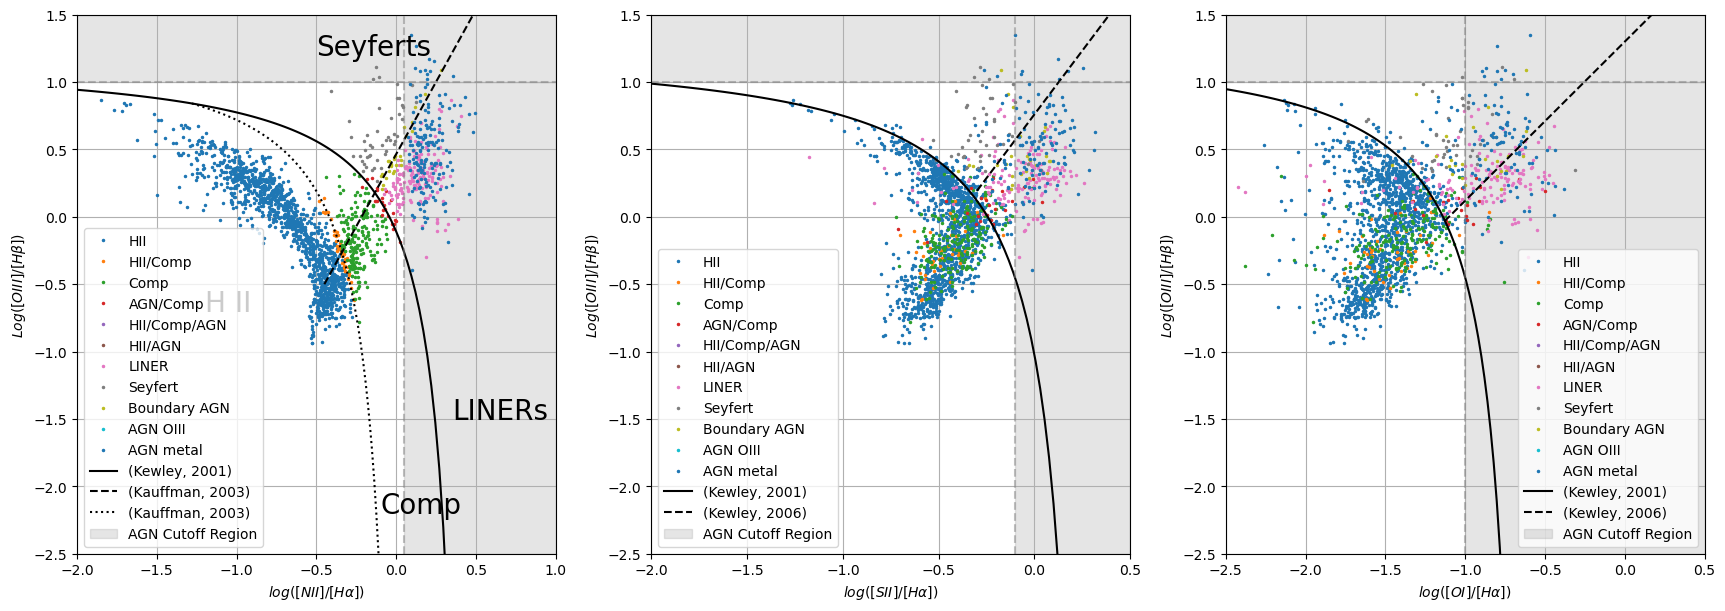

In [110]:
SN_lim = 5

fig1, axs, SAMI_spectra_table_hdu, all_galaxy_types_array = all_fctns.plot_full_BPT_diagrams(SAMI_spectra_table_hdu, SN_lim=SN_lim, all_galaxy_types_array='N II')

### Oxygen Diagram w/ NII labels

{'agg_filter': None, 'alpha': None, 'animated': False, 'axes': [<Axes: >], 'children': [<matplotlib.patches.Rectangle object at 0x00000247EF147910>, <Axes: >, Text(0.5, 0.98, '[O III]/[O II] Against [O I]/Hα Diagnostic Diagram for 1.4 arcsec Aperture with S/N>5')], 'clip_box': None, 'clip_on': True, 'clip_path': None, 'constrained_layout': False, 'constrained_layout_pads': (None, None, None, None), 'default_bbox_extra_artists': [<Axes: >, Text(0.5, 0.98, '[O III]/[O II] Against [O I]/Hα Diagnostic Diagram for 1.4 arcsec Aperture with S/N>5'), <matplotlib.spines.Spine object at 0x00000247EF252550>, <matplotlib.spines.Spine object at 0x00000247EF250FD0>, <matplotlib.spines.Spine object at 0x00000247EEFD7410>, <matplotlib.spines.Spine object at 0x00000247EFAF5AD0>, <matplotlib.patches.Rectangle object at 0x00000247F6938350>], 'dpi': 100.0, 'edgecolor': (1.0, 1.0, 1.0, 1.0), 'facecolor': (1.0, 1.0, 1.0, 1.0), 'figheight': 7.0, 'figure': <Figure size 1000x700 with 1 Axes>, 'figwidth': 10.0,

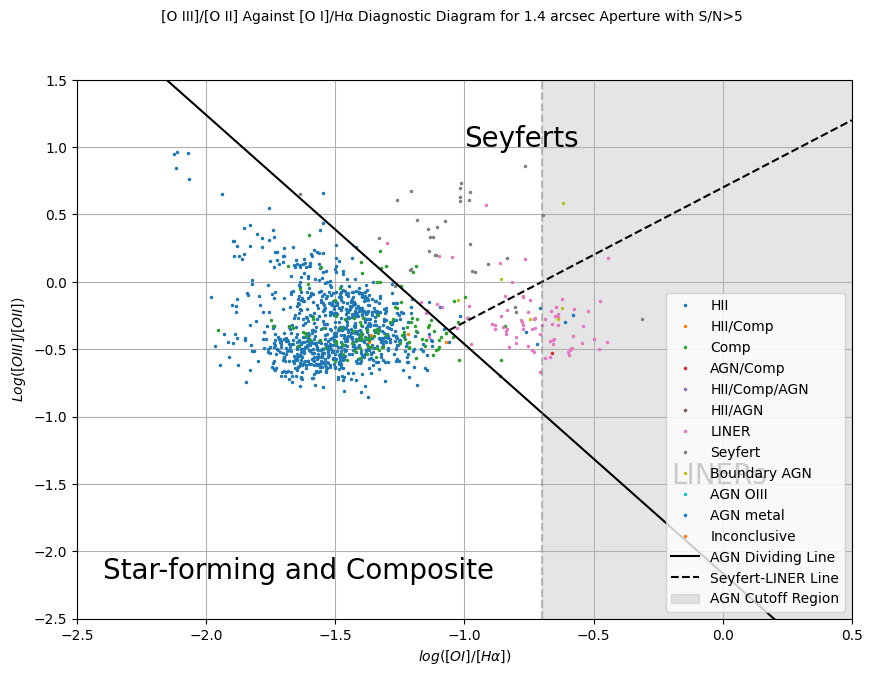

In [42]:
SN_lim = 5


with fits.open(Source_dir +"Catalogues\\" + SAMI_spectra_catalogue) as SAMI_spectra_hdul:
    SAMI_spectra_table_hdu = Table(SAMI_spectra_hdul[1].data)


height, width = 7, 10
fig1, axs = plt.subplots(1, 1)
fig1.set(figheight=height, figwidth=width)
fig1.suptitle(f'[O III]/[O II] Against [O I]/Hα Diagnostic Diagram for 1.4 arcsec Aperture with S/N>{SN_lim}', fontsize=10)
print(fig1.properties())
plot_xlims = [-2.5, 0.5]

# construct BPT for 1.4 sec aperture removing anything with S/N ratio greater than limit
OIII_flux, OIII_error = all_fctns.get_flux_and_error_1_4_ARCSEC(SAMI_spectra_table_hdu, 'O III')
OII_flux, OII_error = all_fctns.get_flux_and_error_1_4_ARCSEC(SAMI_spectra_table_hdu, 'O II')

BPT_y = np.log10(OIII_flux/OII_flux)

HAlpha_flux, HAlpha_error = all_fctns.get_flux_and_error_1_4_ARCSEC(SAMI_spectra_table_hdu, 'H Alpha')
OI_flux, OI_error = all_fctns.get_flux_and_error_1_4_ARCSEC(SAMI_spectra_table_hdu, 'O I') 

SN_mask =(OII_flux/OII_error > SN_lim) & (OIII_flux/OIII_error > SN_lim) & (HAlpha_flux/HAlpha_error > SN_lim) & (OI_flux/OI_error > SN_lim)
print(f"Number of galaxies with S/N > {SN_lim}:")
print(f"{'O III:':10} {sum((OIII_flux/OIII_error > SN_lim))}")
print(f"{'O II:':10} {sum((OII_flux/OII_error > SN_lim))}")
print(f"{'H alpha:':10} {sum((HAlpha_flux/HAlpha_error > SN_lim))}")
print(f"{'O I:':10} {sum((OI_flux/HAlpha_error > OI_error))}")
print(f"{'Total':10} {sum(SN_mask)}")


BPT_y = np.log10(OIII_flux/OII_flux)
BPT_x = np.log10(OI_flux/HAlpha_flux)

BPT_y_error = BPT_y * np.sqrt( (OIII_error/OIII_flux)**2+(OII_error/OII_flux)**2)
BPT_x_error = BPT_x * np.sqrt( (OI_error/OI_flux)**2+(HAlpha_error/HAlpha_flux)**2)


ax = axs

galaxy_labels = ('HII', 'HII/Comp', 'Comp', 'AGN/Comp', 'HII/Comp/AGN', 'HII/AGN', 'LINER', 'Seyfert', 'Boundary AGN', 'AGN OIII', 'AGN metal', 'Inconclusive')
possible_galaxies = (0,1,2,3,4,5,6,7,8,9,10, -1)


for possible_type in possible_galaxies:
    # use NII_galaxy_types array from previous block
    galaxy_type_mask = NII_galaxy_types == possible_type

    if len(galaxy_type_mask)==0:
        continue

    ax.plot(BPT_x[SN_mask & galaxy_type_mask], BPT_y[SN_mask & galaxy_type_mask],'.', markersize=3, label=galaxy_labels[possible_type]) 

all_fctns.plot_Oxygen_diagnostic_lines(ax, have_legend=True)

## Combining into a Summary table

In [43]:
SAMI_spectra_catalogue = "EmissionLine1compDR3.fits"
fits_filepath = Source_dir+"Catalogues\\"

diagnostic_diagrams = ( ('BPT', 'N II'), ('BPT', 'S II'), ('BPT', 'O I'), ('O_diagram', 'O I'))

SAMI_metal_column = {'N II':'NII6583_1_4_ARCSECOND', 'S II': 'SII6716_1_4_ARCSECOND', 'O I': 'OI6300_1_4_ARCSECOND'}



with fits.open(fits_filepath+SAMI_spectra_catalogue) as SAMI_spectra_hdul:
    #initialise table with first 3 columns
    SAMI_spectra_table_hdu =  Table(SAMI_spectra_hdul[1].data)
    SAMI_spectra_table_hdu.sort('CATID')


    Summary_table_hdu = SAMI_spectra_table_hdu.copy()
    Summary_table_hdu.keep_columns(('CUBEID', 'CUBEIDPUB', 'CATID', 'Z_SPEC'))
print(len(Summary_table_hdu))

OIII_flux = SAMI_spectra_table_hdu['OIII5007_1_4_ARCSECOND']
OIII_error = SAMI_spectra_table_hdu['OIII5007_1_4_ARCSECOND_ERR']
HBeta_flux = SAMI_spectra_table_hdu['HBETA_1_4_ARCSECOND']
HBeta_error = SAMI_spectra_table_hdu['HBETA_1_4_ARCSECOND_ERR']

HAlpha_flux = SAMI_spectra_table_hdu['HALPHA_1_4_ARCSECOND']
HAlpha_error = SAMI_spectra_table_hdu['HALPHA_1_4_ARCSECOND_ERR']


OII_flux = SAMI_spectra_table_hdu['OII3726_1_4_ARCSECOND']
OII_error = SAMI_spectra_table_hdu['OII3726_1_4_ARCSECOND_ERR']

OI_flux = SAMI_spectra_table_hdu['OI6300_1_4_ARCSECOND']
OI_error = SAMI_spectra_table_hdu['OI6300_1_4_ARCSECOND_ERR']



for diagnostic_diagram in diagnostic_diagrams:
    plot_type = diagnostic_diagram[0]
    metal = diagnostic_diagram[1]

    if plot_type == 'BPT':
        metal_flux = SAMI_spectra_table_hdu[SAMI_metal_column[metal]]
        metal_error = SAMI_spectra_table_hdu[f'{SAMI_metal_column[metal]}_ERR']

        BPT_y = np.log10(OIII_flux/HBeta_flux)
        BPT_x = np.log10(metal_flux/HAlpha_flux)

        BPT_y_error = np.abs(BPT_y * np.sqrt( (OIII_error/OIII_flux)**2+(HBeta_error/HBeta_flux)**2))
        BPT_x_error = np.abs(BPT_x * np.sqrt( (metal_error/metal_flux)**2+(HAlpha_error/HAlpha_flux)**2))

        colname_prefix = f'{SAMI_metal_column[metal]}_{plot_type}'

        
    elif plot_type == 'O_diagram':
        BPT_y = np.log10(OIII_flux/OII_flux)
        BPT_x = np.log10(OI_flux/HAlpha_flux)

        BPT_y_error = np.abs(BPT_y * np.sqrt( (OIII_error/OIII_flux)**2+(OII_error/OII_flux)**2))
        BPT_x_error = np.abs(BPT_x * np.sqrt( (OI_error/OI_flux)**2+(HAlpha_error/HAlpha_flux)**2))

        colname_prefix = f'{plot_type}'

    else:  
        print(f"Invalid plot type: {plot_type}")
        raise(TypeError)
    
    print(colname_prefix)

    max_SN_ls = np.max(np.array([BPT_y_error, BPT_x_error]), axis=0)

    galaxy_types = get_BPT_AGN_classification(BPT_x, BPT_x_error, BPT_y, BPT_y_error, plot_type=plot_type, metal=metal)

    Summary_table_hdu.add_column(astropy.table.Column(max_SN_ls, name=f'{colname_prefix}_max_SN'))
    Summary_table_hdu.add_column(astropy.table.Column(galaxy_types, name=f'{colname_prefix}_Galaxy_Classification'))

Summary_table_hdu
    


3425
NII6583_1_4_ARCSECOND_BPT


ValueError: Inconsistent data column lengths

## BPT diagrams for crossmatched cubes

414
386
165
94


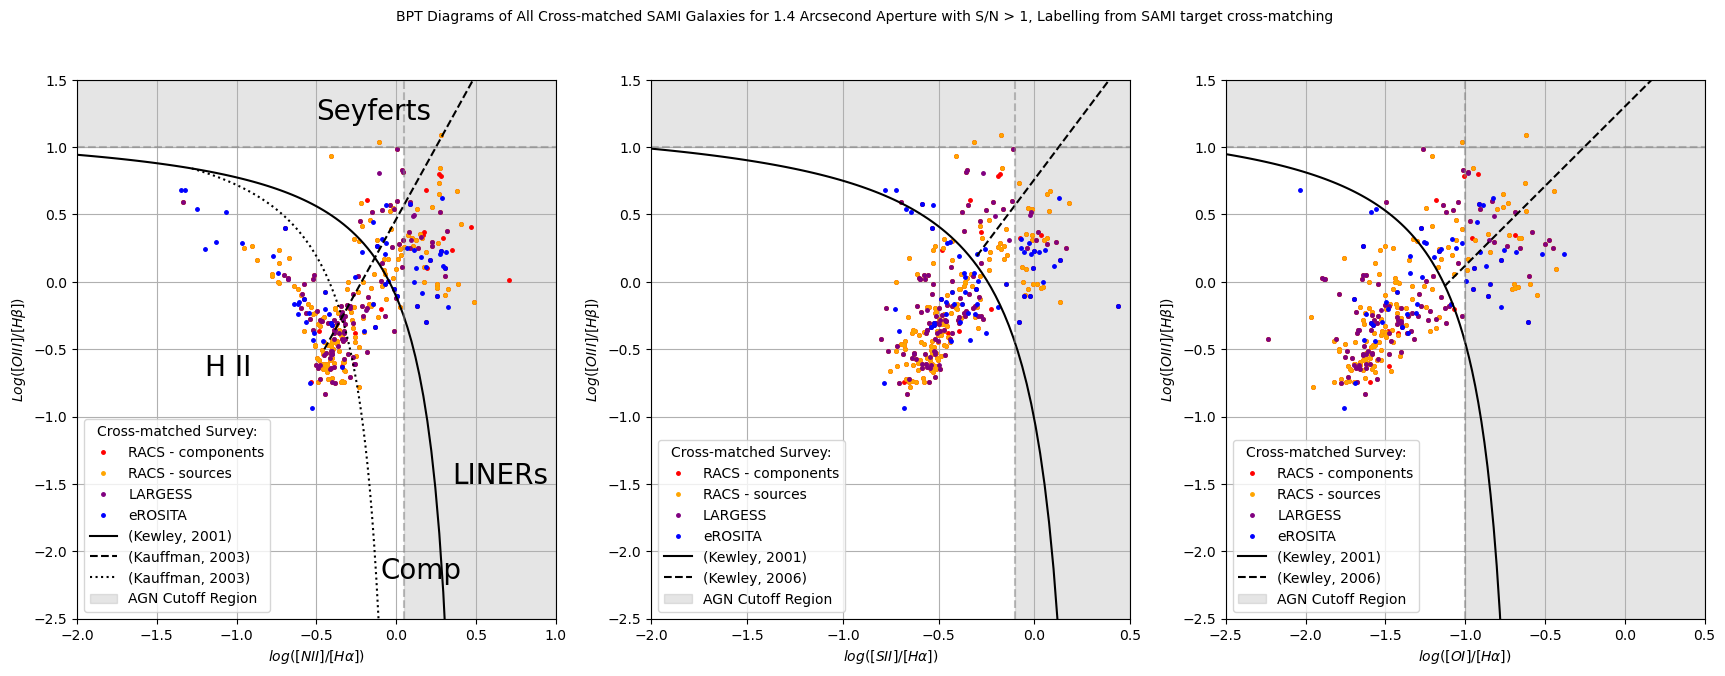

In [111]:

fits_filepath = Source_dir+"Catalogues\\"

crossmatching_catalogues = ("RACS-mid1_components.fits", "RACS-mid1_sources.fits", "LARGESS.fits", "eRASS1_Main.v1.1.fits")
crossmatching_labels_colours = { "RACS-mid1_components.fits": ("RACS - components", "red"), "RACS-mid1_sources.fits": ("RACS - sources", "orange"), "LARGESS.fits": ("LARGESS", "purple"), "eRASS1_Main.v1.1.fits": ("eROSITA", "blue")}



SN_lim = 1

height, width = 7, 21
fig1, axs = plt.subplots(1, 3)
fig1.set_figheight(height)
fig1.set_figwidth(width)
fig1.suptitle(f'BPT Diagrams of All Cross-matched SAMI Galaxies for 1.4 Arcsecond Aperture with S/N > {SN_lim}, Labelling from SAMI target cross-matching', fontsize=10)

plot_xlims = {'N II': [-2, 1], 'S II': [-2, 0.5], 'O I': [-2.5, 0.5]} 

bpt_metals = ('N II', 'S II', 'O I')

# x limits to stop log from changing sign and div by 0
kewley_xlims = {'N II': 0.47, 'S II': 0.31, 'O I': -0.59} 
kauffman_xlims = [-1.3, 0.05]
Seyfert_LINER_line_startpoints = {'N II': -0.45, 'S II': -0.3, 'O I': -1.13}



with fits.open(Source_dir +"Catalogues\\" + SAMI_spectra_catalogue) as SAMI_spectra_hdul:
    SAMI_spectra_table_hdu = Table(SAMI_spectra_hdul[1].data)



crossmatched_filename = f"all_SAMI_target_matched_All_Surveys.fits"
crossmatched_filepath = fits_filepath+"Crossmatched\\"+crossmatched_filename

with fits.open(crossmatched_filepath) as crossmatched_hdul:
    crossmatched_table_hdu = Table(crossmatched_hdul[1].data)



for j, crossmatching_catalogue in enumerate(crossmatching_catalogues):    

    in_catalogue_mask = np.array(crossmatched_table_hdu[f'IN_{crossmatching_catalogue[:-5]}'], dtype= bool)
    print(sum(in_catalogue_mask))
    matched_catalogue_table = crossmatched_table_hdu[in_catalogue_mask]
    matched_CATIDS = matched_catalogue_table['CATID']

    matched_SAMI_spectra_table = SAMI_spectra_table_hdu[np.isin(SAMI_spectra_table_hdu['CATID'], matched_CATIDS)]


    for i, metal in enumerate(bpt_metals):
        # construct BPT for 1.4 sec aperture removing anything with S/N ratio greater than limit

        OIII_flux, OIII_error = get_flux_and_error_1_4_ARCSEC(matched_SAMI_spectra_table, 'O III')
        HBeta_flux, HBeta_error = get_flux_and_error_1_4_ARCSEC(matched_SAMI_spectra_table, 'H Beta')

        HAlpha_flux, HAlpha_error = get_flux_and_error_1_4_ARCSEC(matched_SAMI_spectra_table, 'H Alpha')
        metal_flux, metal_error = get_flux_and_error_1_4_ARCSEC(matched_SAMI_spectra_table, metal)


        SN_mask = (HBeta_flux/HBeta_error > SN_lim) & (OIII_flux/OIII_error > SN_lim) & (HAlpha_flux/HAlpha_error > SN_lim) & (metal_flux/metal_error > SN_lim)

        BPT_y = np.log10(OIII_flux/HBeta_flux)
        BPT_x = np.log10(metal_flux/HAlpha_flux)

        BPT_y_error = BPT_y * np.sqrt( (OIII_error/OIII_flux)**2+(HBeta_error/HBeta_flux)**2)
        BPT_x_error = BPT_x * np.sqrt( (metal_error/metal_flux)**2+(HAlpha_error/HAlpha_flux)**2)

        if i ==0:
            NII_galaxy_types = get_BPT_AGN_classification(BPT_x, BPT_x_error, BPT_y, BPT_y_error, metal=metal)

        ax = axs.flatten()[i]

        ax.plot(BPT_x[SN_mask], BPT_y[SN_mask],'.', markersize=5, label=crossmatching_labels_colours[crossmatching_catalogue][0], 
                color = crossmatching_labels_colours[crossmatching_catalogue][1]) 

        if j ==3:
            plot_BPT_lines(ax, metal, have_legend=True)
            ax.legend(title='Cross-matched Survey:')

    

# Classification Testing

Get a lot of -1 classifications for the radio matched sources, no non-AGN classifications

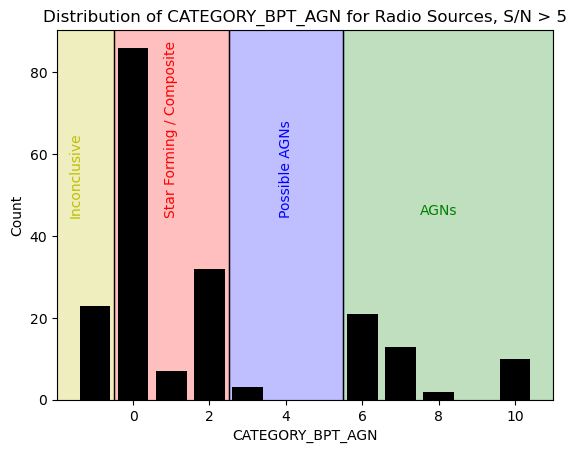

In [45]:
with fits.open(Source_dir +"Catalogues\\Crossmatched\\SAMI_AGN_matches.fits") as SAMI_AGN_matches_hdul:
    Summary_table_hdu = Table(SAMI_AGN_matches_hdul[1].data)

Summary_table_hdu_radiomatches = Summary_table_hdu[Summary_table_hdu['IS_RADIOSOURCE'] == 1]

# Get the column as a numpy array
categories = np.array(Summary_table_hdu_radiomatches['CATEGORY_BPT_AGN'])

# Count occurrences of each unique value
unique, counts = np.unique(categories, return_counts=True)

# Create the bar plot
plt.bar(unique, counts)
plt.xlabel('CATEGORY_BPT_AGN')
plt.ylabel('Count')
plt.title('Distribution of CATEGORY_BPT_AGN for Radio Sources, S/N > 5')

xlims = plt.xlim()
ylims = plt.ylim()

plt.xlim(xlims[0], xlims[1])
plt.ylim(ylims[0], ylims[1])

plt.axvline(x=5.5, color='black', linewidth=1)
plt.fill_betweenx([0, ylims[1]], 5.5, xlims[1], color='g', alpha=0.25, label='AGNs')
plt.text(8, 0.5*ylims[1], 'AGNs', color='g', fontsize=10, ha='center')

plt.axvline(x=2.5, color='black', linewidth=1)
plt.fill_betweenx([0, ylims[1]], 2.5, 5.5, color='b', alpha=0.25, label='Possible AGNs')
plt.text(4, 0.5*ylims[1], 'Possible AGNs', color='b', fontsize=10, ha='center', rotation='vertical')

plt.axvline(x=-0.5, color='black', linewidth=1)
plt.fill_betweenx([0, ylims[1]], -0.5, 2.5, color='r', alpha=0.25, label='Star Forming / Composite')
plt.text(1, 0.5*ylims[1], 'Star Forming / Composite', color='r', fontsize=10, ha='center', rotation='vertical')

plt.fill_betweenx([0, ylims[1]], xlims[0], -0.5, color='y', alpha=0.25, label='Inconclusive')
plt.text(-1.5, 0.5*ylims[1], 'Inconclusive', color='y', fontsize=10, ha='center', rotation='vertical')

plt.bar(unique, counts, color='black')

plt.show()

Number of galaxies with S/N > 5:
O III:     209
H beta:    202
H alpha:   217

N II       218
N II Total 198

S II       202
S II Total 193

O I        184
O I Total  181



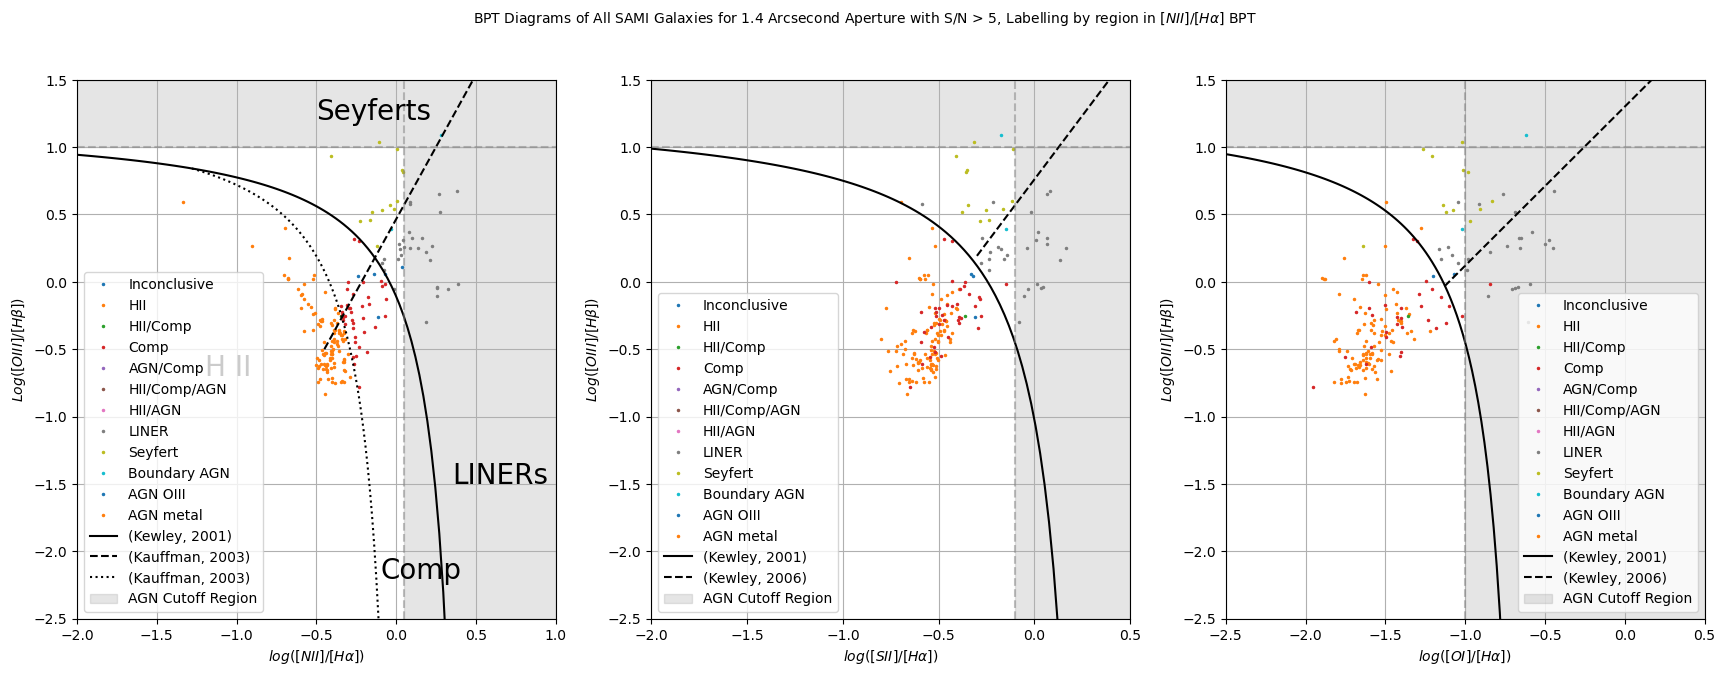

In [ ]:
refresh_module()

SN_lim = 5

relevant_CATIDS = np.array(Summary_table_hdu_radiomatches['CATID'])

relevant_SAMI_spectra_table = SAMI_spectra_table_hdu.copy()
relevant_SAMI_spectra_table = relevant_SAMI_spectra_table[np.isin(relevant_SAMI_spectra_table['CATID'], relevant_CATIDS)]


# x limits to stop log from changing sign and div by 0
kewley_xlims = {'N II': 0.47, 'S II': 0.31, 'O I': -0.59} 
kauffman_xlims = [-1.3, 0.05]
Seyfert_LINER_line_startpoints = {'N II': -0.45, 'S II': -0.3, 'O I': -1.13}

height, width = 7, 21
fig1, axs = plt.subplots(1, 3)
fig1.set_figheight(height)
fig1.set_figwidth(width)
fig1.suptitle(f'BPT Diagrams of All SAMI Galaxies for 1.4 Arcsecond Aperture with S/N > {SN_lim}, Labelling by region in $[NII]/[H\\alpha]$ BPT', fontsize=10)

plot_xlims = {'N II': [-2, 1], 'S II': [-2, 0.5], 'O I': [-2.5, 0.5]} 


# construct BPT for 1.4 sec aperture removing anything with S/N ratio greater than limit
OIII_flux, OIII_error = all_fctns.get_flux_and_error_1_4_ARCSEC(relevant_SAMI_spectra_table, 'O III')
HBeta_flux, HBeta_error = all_fctns.get_flux_and_error_1_4_ARCSEC(relevant_SAMI_spectra_table, 'H Beta')

BPT_y = np.log10(OIII_flux/HBeta_flux)

HAlpha_flux, HAlpha_error = all_fctns.get_flux_and_error_1_4_ARCSEC(relevant_SAMI_spectra_table, 'H Alpha')
print(f"Number of galaxies with S/N > {SN_lim}:")
print(f"{'O III:':10} {sum((OIII_flux/OIII_error > SN_lim))}")
print(f"{'H beta:':10} {sum((HBeta_flux/HBeta_error > SN_lim))}")
print(f"{'H alpha:':10} {sum((HAlpha_flux/HAlpha_error > SN_lim))}\n")

galaxy_labels = ('HII', 'HII/Comp', 'Comp', 'AGN/Comp', 'HII/Comp/AGN', 'HII/AGN', 'LINER', 'Seyfert', 'Boundary AGN', 'AGN OIII', 'AGN metal', 'Inconclusive')
possible_galaxies = (-1, 0,1,2,3,4,5,6,7,8,9,10)


#testing
for i, metal in enumerate(bpt_metals):
    #for i, metal in enumerate(bpt_metals):
    metal_flux, metal_error = all_fctns.get_flux_and_error_1_4_ARCSEC(relevant_SAMI_spectra_table, metal)

    print(f"{metal:10} {sum((metal_flux/metal_error > SN_lim))}")

    SN_mask = (HBeta_flux/HBeta_error > SN_lim) & (OIII_flux/OIII_error > SN_lim) & (HAlpha_flux/HAlpha_error > SN_lim) & (metal_flux/metal_error > SN_lim)
    print(f"{f'{metal} Total':10} {sum(SN_mask)}\n")

    BPT_y = np.log10(OIII_flux/HBeta_flux)
    BPT_x = np.log10(metal_flux/HAlpha_flux)

    BPT_y_error = BPT_y * np.sqrt( (OIII_error/OIII_flux)**2+(HBeta_error/HBeta_flux)**2)
    BPT_x_error = BPT_x * np.sqrt( (metal_error/metal_flux)**2+(HAlpha_error/HAlpha_flux)**2)

    if i ==0:
        NII_galaxy_types, _ = all_fctns.get_BPT_AGN_classification(BPT_x, BPT_x_error, BPT_y, BPT_y_error, metal=metal)

    ax = axs.flatten()[i]

    for possible_type in possible_galaxies:

        galaxy_type_mask = NII_galaxy_types == possible_type

        if type(galaxy_type_mask) == bool:
            galaxy_type_mask = (galaxy_type_mask,)
        
        if len(galaxy_type_mask)==0:
            continue

        ax.plot(BPT_x[SN_mask & galaxy_type_mask], BPT_y[SN_mask & galaxy_type_mask],'.', markersize=3, label=galaxy_labels[possible_type]) 
    all_fctns.plot_BPT_lines(ax, metal, have_legend=True)



## plot_full_BPT_diagrams() function testing

c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\Code\all_fctns.py:194: RuntimeWarning: invalid value encountered in log10
  
c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\Code\all_fctns.py:197: RuntimeWarning: invalid value encountered in log10
  
c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\Code\all_fctns.py:35: RuntimeWarning: divide by zero encountered in divide
  ybpt = 0.61/(xbpt-0.47) + 1.19
c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\Code\all_fctns.py:25: RuntimeWarning: divide by zero encountered in divide
  ybpt = 0.61/(xbpt-0.05) + 1.3
c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\Code\all_fctns.py:39: RuntimeWarning: divide by zero encountered in divide
  ybpt = 0.72/(xbpt-0.31) + 1.30
c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\Code\al

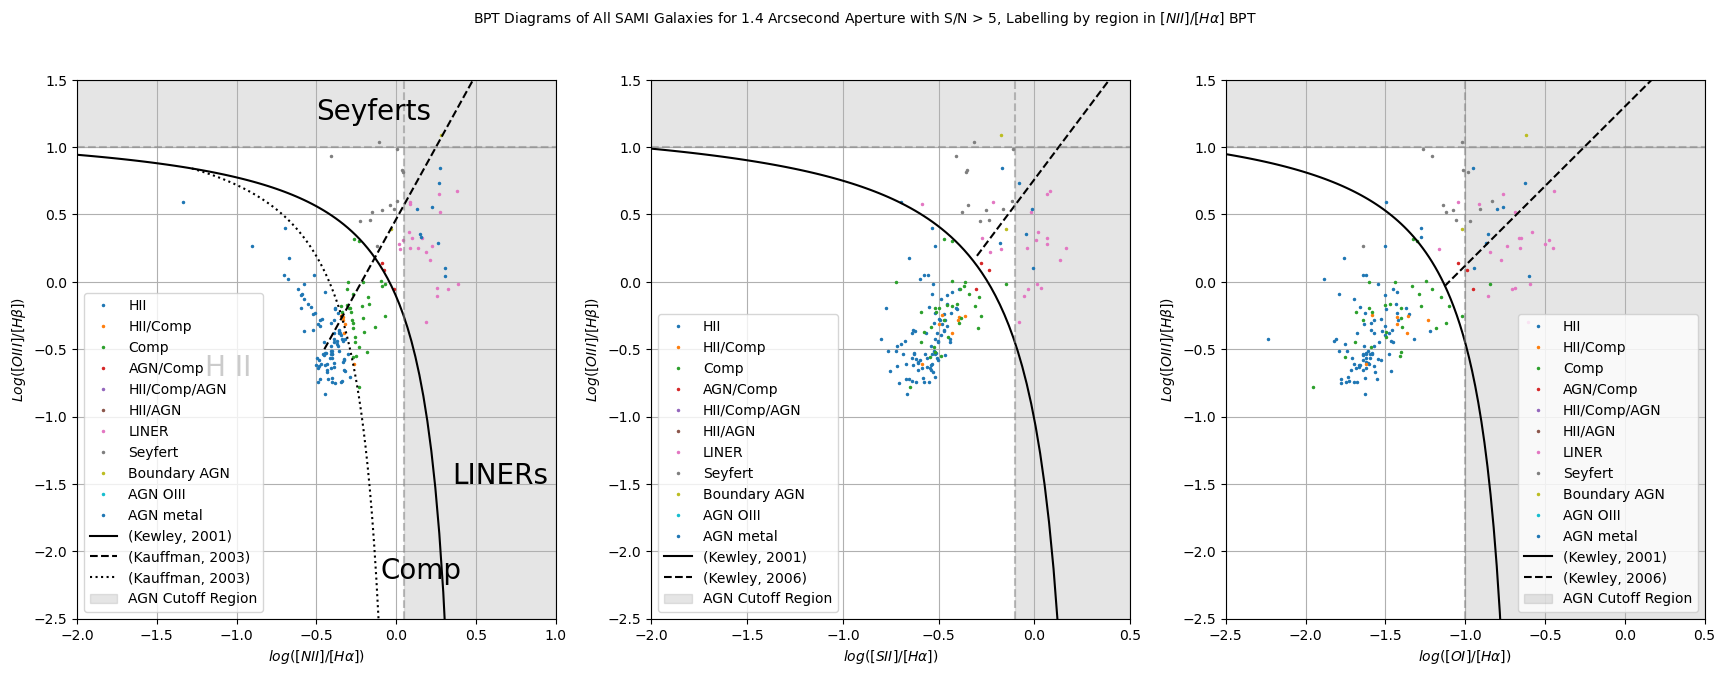

<BarContainer object of 9 artists>

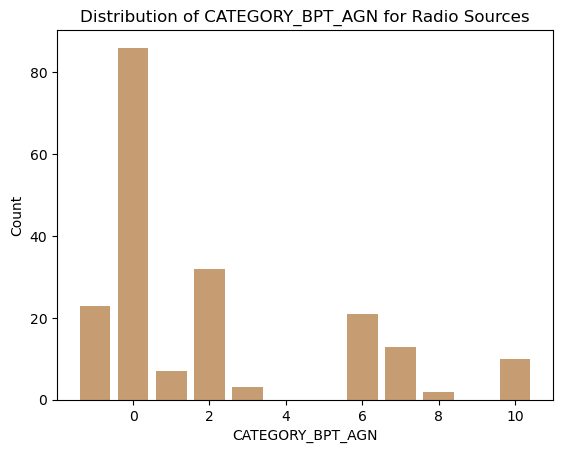

In [96]:
def plot_full_BPT_diagrams(relevant_SAMI_spectra_table, SN_lim=5, bpt_metals=('N II', 'S II', 'O I'), 
                           fig1 = None, fig_height=7, fig_width=21,
                            plot_xlims=None,
                            print_SN_counts=True,
                            all_galaxy_types_array=None, galaxy_type_labels=None, all_same_label=False):
    """
    Plots the full BPT diagrams for the given SAMI spectra table. \\
    
    Parameters: \\
    - relevant_SAMI_spectra_table: The relevant SAMI spectra table. \\
    - SN_lim: The signal-to-noise ratio limit for plotting (and classifying). \\
    - bpt_metals: The list of metals to use for the BPT diagrams. \\
    - fig1: The figure object to plot on. If None, a new figure will be created. \\
    - fig_height: Height of the figure. \\
    - fig_width: Width of the figure. \\
    - plot_xlims: Dictionary of x limits for each metal. \\
    - all_galaxy_types_array: The already classified point labels to use for the plot, their value should correspond to the index in the galaxy_type_labels list. If None, will classify based on each metals BPT. If 'N II', will classify based on N II BPT. If provided, will use these labels for the points.
    """

    # figure setup / options    
    if fig1 is None:
        fig1, axs = plt.subplots(1, len(bpt_metals))

    fig1.set_figheight(fig_height)
    fig1.set_figwidth(fig_width)


    # BPT initialisation and limits
    if plot_xlims is None:
        plot_xlims = {'N II': [-2, 1], 'S II': [-2, 0.5], 'O I': [-2.5, 0.5]}
    
    kewley_xlims = {'N II': 0.47, 'S II': 0.31, 'O I': -0.59}
    kauffman_xlims = [-1.3, 0.05]
    Seyfert_LINER_line_startpoints = {'N II': -0.45, 'S II': -0.3, 'O I': -1.13}


    # labels and possible galaxy types
    if all_same_label: # if all points are to be labelled the same, set all_galaxy_types_array to list of zeros and possible_galaxies to just 0
        all_galaxy_types_array = np.zeros(len(relevant_SAMI_spectra_table), dtype=int)
        possible_galaxies = (0, )

    if all_galaxy_types_array in (None, 'N II'): # if no galaxy types provided, classify based on NII BPT classification
        galaxy_type_labels = ('HII', 'HII/Comp', 'Comp', 'AGN/Comp', 'HII/Comp/AGN', 'HII/AGN', 'LINER', 'Seyfert', 'Boundary AGN', 'AGN OIII', 'AGN metal', 'Inconclusive')
        possible_galaxies = (0,1,2,3,4,5,6,7,8,9,10)

        label_type = all_galaxy_types_array # need to store as will reuse all_galaxy_types_array for each metal BPT classification
        all_galaxy_types_array = np.zeros(len(relevant_SAMI_spectra_table), dtype=int) # reset to zeros


    else: # need to get new possible_galaxies values and corresponding galaxy_AGN_labels
        possible_galaxies = np.unique(all_galaxy_types_array)

        if galaxy_type_labels is None: # i.e. if no labels provided, use the possible_galaxies values as labels
            galaxy_type_labels = possible_galaxies
        else:
            if len(galaxy_type_labels) != len(possible_galaxies):
                raise ValueError("Length of galaxy_type_labels must match length of possible_galaxies.")



    # construct BPT for 1.4 sec aperture removing anything with S/N ratio greater than limit
    OIII_flux, OIII_error = all_fctns.get_flux_and_error_1_4_ARCSEC(relevant_SAMI_spectra_table, 'O III')
    HBeta_flux, HBeta_error = all_fctns.get_flux_and_error_1_4_ARCSEC(relevant_SAMI_spectra_table, 'H Beta')

    HAlpha_flux, HAlpha_error = all_fctns.get_flux_and_error_1_4_ARCSEC(relevant_SAMI_spectra_table, 'H Alpha')
    if print_SN_counts:
        print(f"Number of galaxies with S/N > {SN_lim}:")
        print(f"{'O III:':10} {sum((OIII_flux/OIII_error > SN_lim))}/{len(OIII_flux)}")
        print(f"{'H beta:':10} {sum((HBeta_flux/HBeta_error > SN_lim))}/{len(HBeta_flux)}")
        print(f"{'H alpha:':10} {sum((HAlpha_flux/HAlpha_error > SN_lim))}/{len(HAlpha_flux)}\n")

    #testing
    for i, metal in enumerate(bpt_metals):
        #for i, metal in enumerate(bpt_metals):
        metal_flux, metal_error = all_fctns.get_flux_and_error_1_4_ARCSEC(relevant_SAMI_spectra_table, metal)

        SN_mask = (HBeta_flux/HBeta_error > SN_lim) & (OIII_flux/OIII_error > SN_lim) & (HAlpha_flux/HAlpha_error > SN_lim) & (metal_flux/metal_error > SN_lim)

        if print_SN_counts:
            print(f"{metal:10} {sum((metal_flux/metal_error > SN_lim))}/{len(metal_flux)}")
            print(f"{f'{metal} Total':10} {sum(SN_mask)}/{len(SN_mask)}\n")

        BPT_y = OIII_flux/HBeta_flux
        BPT_x = metal_flux/HAlpha_flux

        BPT_y_error = np.abs(BPT_y * np.sqrt( (OIII_error/OIII_flux)**2+(HBeta_error/HBeta_flux)**2))
        BPT_x_error = np.abs(BPT_x * np.sqrt( (metal_error/metal_flux)**2+(HAlpha_error/HAlpha_flux)**2))

        if i ==0 and label_type == 'N II':
            all_galaxy_types_array, _ = all_fctns.get_BPT_AGN_classification(BPT_x, BPT_x_error, BPT_y, BPT_y_error, metal=metal)
       
        elif label_type is None: # if no galaxy types provided, classify based on NII BPT classification
            all_galaxy_types_array, _ = all_fctns.get_BPT_AGN_classification(BPT_x, BPT_x_error, BPT_y, BPT_y_error, metal=metal)
        
        
        ax = axs.flatten()[i]


        for possible_type in possible_galaxies:
            
            galaxy_type_mask = NII_galaxy_types == possible_type
        
            if type(galaxy_type_mask) == bool:
                galaxy_type_mask = (galaxy_type_mask,)

            if len(galaxy_type_mask)==0:
                continue
            
            ax.plot(np.log10(BPT_x[galaxy_type_mask]), np.log10(BPT_y[galaxy_type_mask]),'.', markersize=3, label=galaxy_type_labels[possible_type]) 
        all_fctns.plot_BPT_lines(ax, metal, have_legend=True)

    return fig1, axs, relevant_SAMI_spectra_table, NII_galaxy_types


refresh_module()

SN_lim = 5

with fits.open(Source_dir +"Catalogues\\Crossmatched\\SAMI_AGN_matches.fits") as SAMI_AGN_matches_hdul:
    Summary_table_hdu = Table(SAMI_AGN_matches_hdul[1].data)

Summary_table_hdu_radiomatches = Summary_table_hdu[Summary_table_hdu['IS_RADIOSOURCE'] == 1]

relevant_CUBEIDs = np.char.strip(Summary_table_hdu_radiomatches['CUBEIDPUB'])

relevant_SAMI_spectra_table = SAMI_spectra_table_hdu.copy()

relevant_SAMI_spectra_table = relevant_SAMI_spectra_table[np.isin(np.char.strip(relevant_SAMI_spectra_table['CUBEIDPUB']), relevant_CUBEIDs)]

fig1, axs, relevant_SAMI_spectra_table, NII_galaxy_types = plot_full_BPT_diagrams(relevant_SAMI_spectra_table, print_SN_counts=False)

fig1.suptitle(f'BPT Diagrams of All SAMI Galaxies for 1.4 Arcsecond Aperture with S/N > {SN_lim}, Labelling by region in $[NII]/[H\\alpha]$ BPT', fontsize=10)

plt.show()



# Get the column as a numpy array
categories = np.array(Summary_table_hdu_radiomatches['CATEGORY_BPT_AGN'])

# Count occurrences of each unique value
unique, counts = np.unique(categories, return_counts=True)

# Create the bar plot
plt.bar(unique, counts, alpha=0.5)
plt.xlabel('CATEGORY_BPT_AGN')
plt.ylabel('Count')
plt.title('Distribution of CATEGORY_BPT_AGN for Radio Sources')

unique, counts = np.unique(NII_galaxy_types, return_counts=True)
plt.bar(unique, counts, alpha=0.5)


In [87]:
with fits.open(Source_dir +"Catalogues\\Crossmatched\\SAMI_AGN_matches.fits") as SAMI_AGN_matches_hdul:
    Summary_table_hdu = Table(SAMI_AGN_matches_hdul[1].data)

Summary_table_hdu_radiomatches = Summary_table_hdu[Summary_table_hdu['IS_RADIOSOURCE'] == 1]

relevant_CUBEIDs = np.array(Summary_table_hdu_radiomatches['CUBEIDPUB'])

relevant_SAMI_spectra_table = SAMI_spectra_table_hdu.copy()
#print(relevant_SAMI_spectra_table['CUBEIDPUB', 'CATID'])
#print(Summary_table_hdu_radiomatches['CUBEIDPUB', 'CATID'])

test_table = join(relevant_SAMI_spectra_table['CUBEIDPUB', 'CATID'], Summary_table_hdu_radiomatches['CUBEIDPUB', 'CATID'], keys='CATID', table_names=('SAMI_spectra', 'SAMI_AGN_matches'), join_type='inner')

print(np.char.strip(test_table['CUBEIDPUB_SAMI_AGN_matches']) == np.char.strip(test_table['CUBEIDPUB_SAMI_spectra']))
test_table

[ True  True  True  True False  True  True  True  True False False False
 False False  True  True False False False  True False  True False  True
 False False  True  True  True  True  True False False False  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True False False  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False False  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  T

CUBEIDPUB_SAMI_spectra,CATID,CUBEIDPUB_SAMI_AGN_matches
str16,int64,str16
16026_A,16026,16026_A
17273_A,17273,17273_A
23623_A,23623,23623_A
24013_A,24013,24013_A
30346_B,30346,30346_A
30346_A,30346,30346_A
30847_A,30847,30847_A
30916_A,30916,30916_A
32362_A,32362,32362_A


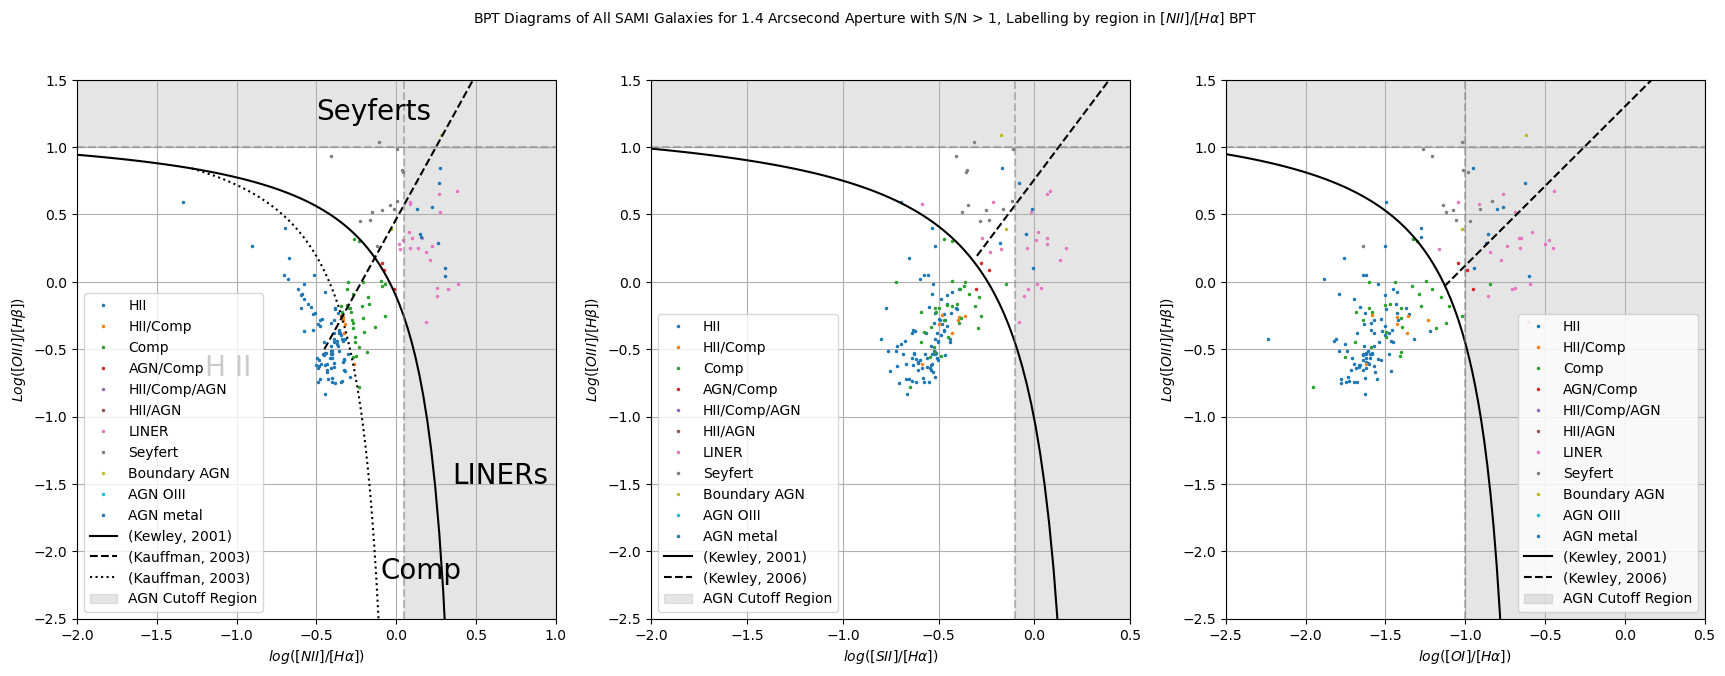

<BarContainer object of 9 artists>

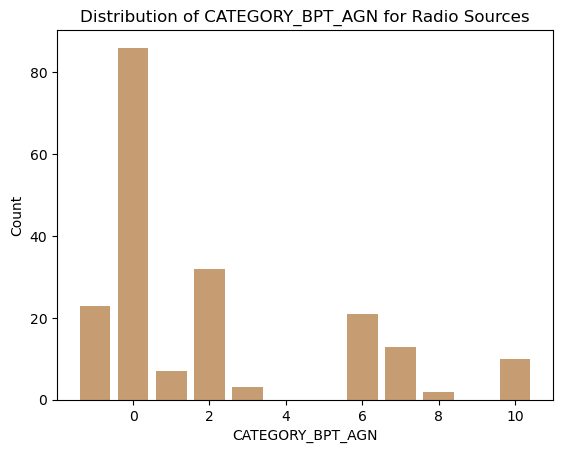

In [105]:
refresh_module()

SN_lim = 1

with fits.open(Source_dir +"Catalogues\\Crossmatched\\SAMI_AGN_matches.fits") as SAMI_AGN_matches_hdul:
    Summary_table_hdu = Table(SAMI_AGN_matches_hdul[1].data)

Summary_table_hdu_radiomatches = Summary_table_hdu[Summary_table_hdu['IS_RADIOSOURCE'] == 1]

relevant_CUBEIDs = np.char.strip(Summary_table_hdu_radiomatches['CUBEIDPUB'])

relevant_SAMI_spectra_table = SAMI_spectra_table_hdu.copy()
relevant_SAMI_spectra_table = relevant_SAMI_spectra_table[np.isin(np.char.strip(relevant_SAMI_spectra_table['CUBEIDPUB']), relevant_CUBEIDs)]

fig1, axs, relevant_SAMI_spectra_table, NII_galaxy_types = all_fctns.plot_full_BPT_diagrams(relevant_SAMI_spectra_table, 
                                                                                            all_galaxy_types_array='N II', 
                                                                                            print_SN_counts=False, 
                                                                                            SN_lim=SN_lim)

fig1.suptitle(f'BPT Diagrams of All SAMI Galaxies for 1.4 Arcsecond Aperture with S/N > {SN_lim}, Labelling by region in $[NII]/[H\\alpha]$ BPT', fontsize=10)

plt.show()



# Get the column as a numpy array
categories = np.array(Summary_table_hdu_radiomatches['CATEGORY_BPT_AGN'])

# Count occurrences of each unique value
unique, counts = np.unique(categories, return_counts=True)

# Create the bar plot
plt.bar(unique, counts, alpha=0.5)
plt.xlabel('CATEGORY_BPT_AGN')
plt.ylabel('Count')
plt.title('Distribution of CATEGORY_BPT_AGN for Radio Sources')

unique, counts = np.unique(NII_galaxy_types, return_counts=True)
plt.bar(unique, counts, alpha=0.5)


# Gassig Labelling

In [ ]:
# figure setup / options    
fig1, axs = plt.subplots(1, len(bpt_metals), figsize=(21, 7))

plot_xlims = {'N II': [-2, 1], 'S II': [-2, 0.5], 'O I': [-2.5, 0.5]}

catalogue_filepath = Source_dir+"Catalogues\\"
shared_catalogue_filepath = Source_dir+"sami_tools_smc_mspa4681\\shared_catalogues\\"
gassig_statistics_catalogue = "gassig_statistics.fits"

with fits.open(shared_catalogue_filepath + "HAlpha_EW_Table.fits") as Ha_EW_hdul:
    Ha_EW_table = Table(Ha_EW_hdul[1].data)

with fits.open( os.path.join(catalogue_filepath, SAMI_spectra_catalogue) ) as SAMI_spectra_hdul:
    SAMI_spectra_table_hdu = Table(SAMI_spectra_hdul[1].data)

with fits.open( os.path.join(shared_catalogue_filepath, "SAMI_AGN_matches.fits") ) as SAMI_AGN_matches_hdul:
    Summary_table_hdu = Table(SAMI_AGN_matches_hdul[1].data)

with fits.open( os.path.join(shared_catalogue_filepath, gassig_statistics_catalogue) ) as gassig_statistics_hdul:
    gassig_statistics_table_hdu = Table(gassig_statistics_hdul[1].data)


# construct BPT for 1.4 sec aperture removing anything with S/N ratio greater than limit
OIII_flux, OIII_error = get_flux_and_error_1_4_ARCSEC(relevant_SAMI_spectra_table, 'O III')
HBeta_flux, HBeta_error = get_flux_and_error_1_4_ARCSEC(relevant_SAMI_spectra_table, 'H Beta')

HAlpha_flux, HAlpha_error = get_flux_and_error_1_4_ARCSEC(relevant_SAMI_spectra_table, 'H Alpha')
if print_SN_counts:
    print(f"Number of galaxies with S/N > {SN_lim}:")
    print(f"{'O III:':10} {sum((OIII_flux/OIII_error > SN_lim))}/{len(OIII_flux)}")
    print(f"{'H beta:':10} {sum((HBeta_flux/HBeta_error > SN_lim))}/{len(HBeta_flux)}")
    print(f"{'H alpha:':10} {sum((HAlpha_flux/HAlpha_error > SN_lim))}/{len(HAlpha_flux)}\n")

#testing
for i, metal in enumerate(bpt_metals):
    #for i, metal in enumerate(bpt_metals):
    metal_flux, metal_error = get_flux_and_error_1_4_ARCSEC(relevant_SAMI_spectra_table, metal)

    SN_mask = (HBeta_flux/HBeta_error > SN_lim) & (OIII_flux/OIII_error > SN_lim) & (HAlpha_flux/HAlpha_error > SN_lim) & (metal_flux/metal_error > SN_lim)

    if print_SN_counts:
        print(f"{metal:10} {sum((metal_flux/metal_error > SN_lim))}/{len(metal_flux)}")
        print(f"{f'{metal} Total':10} {sum(SN_mask)}/{len(SN_mask)}\n")

    BPT_y = OIII_flux/HBeta_flux
    BPT_x = metal_flux/HAlpha_flux

    BPT_y_error = np.abs(BPT_y * np.sqrt( (OIII_error/OIII_flux)**2+(HBeta_error/HBeta_flux)**2))
    BPT_x_error = np.abs(BPT_x * np.sqrt( (metal_error/metal_flux)**2+(HAlpha_error/HAlpha_flux)**2))

    if i ==0 and label_type == 'N II':
        all_galaxy_types_array, _ = get_BPT_AGN_classification(BPT_x, BPT_x_error, BPT_y, BPT_y_error, metal=metal)
    
    elif label_type is None: # if no galaxy types provided, classify based on NII BPT classification
        all_galaxy_types_array, _ = get_BPT_AGN_classification(BPT_x, BPT_x_error, BPT_y, BPT_y_error, metal=metal)
    
    
    ax = axs.flatten()[i]


    for possible_type in possible_galaxies:
        
        galaxy_type_mask = all_galaxy_types_array == possible_type
    
        if type(galaxy_type_mask) == bool:
            galaxy_type_mask = (galaxy_type_mask,)

        if len(galaxy_type_mask)==0:
            continue
        
        ax.plot(np.log10(BPT_x[galaxy_type_mask]), np.log10(BPT_y[galaxy_type_mask]),'.', markersize=3, label=galaxy_type_labels[possible_type]) 
    plot_BPT_lines(ax, metal, have_legend=True)



